# Programming for Data Analysis 2019 Project

## Project Overview:
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 
***


### Goal of the project
The end goal of this project is to simulate a real-world phenomenon across at least one hundred data points across at least 4 different variables.

The goal of this project is simulation. A dataset must be synthesised. The instructions note that it is ok to base the synthesised dataset on an actual real-world dataset but the main task is to  create a synthesised data set.

In this notebook I will look at fulfilling the four specifications here. The notebook will not be broken up into 4 distinct sections. Instead I will keep these specifications in mind.

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
The real-world phenomenon is the World Happiness Score. 

I have chosen to look at the happiness scores as reported in the World Happiness Report as the real world phenomenon.
The first World Happiness Report was published in 2012, the latest in 2019. The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.

Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy.
Happiness indicators are being used by governments, organisations and civil society to help with decision making. Experts believe that measurements of well-being can be used to assess the progress of nations. The World Happiness reports review the state of happiness in the world and show how the new science of happiness explains personal and national variations in happiness.

The underlying source of the happiness scores in the World Happiness Report is the Gallup World Poll - a set of nationally representative undertaken in many countries across the world. The main life evaluation question asked in the poll is:
This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2016-2018.

Happiness and life satisfaction are central research areas in social sciences.

The variables on which national and international happiness scores are calculated are real and quantifiable. These include socio-economic indicators such as gdp, life expectancy etc.
Differences in social support, incomes and healthy life expectancy are the three most important factors in determining the overall happiness score.


2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

First I will look at the variables to be simulated and their likely distributions and how they relate to each other. This will help create a simulated dataset that is as close to the real world phenomenon as possible, within reason of course!.
The variables involved are as follows:
- overall happiness rank
- overall happiness score
- GDP per capita
- Family / Social support
- Healthy / Life Expectancy
- Freedom
- Generosity
- Perceptions of Corruption

3. Synthesise/simulate a data set as closely matching their properties as possible.

4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

There is much global and regional variation in these quantities and this must be taken into account when attempting to simulate data. For this reason I will be looking at the distribution of the underlying variables at a regional level as well as a global level. It is also likely that some of these variables will be correlated with each other and therefore this must be taken into account when simulating the data. 



### About the real-world phenomenon chosen:
1. Choose a real-world phenomenon that can be measured and for which you could collect at least one hundred data points across at least four different variables.


Each year the report has focused in on a different aspect of the report. This info is based on the blurb for each report.

- 2012: The first report reviewed the state of happiness in the world today and showed how the new science of happiness explains personal and national variations in happiness.
- 2013: The second World Happiness Report further focuesed on well-being as a critical component of how the world measures its economic and social development.
- 2015: This report looked at the changes in happiness levels in 158 countries and examined the reasons behind the statistics. 
- 2016: This year the World Happiness Report looked at the measurement and consequences of inequality in the distribution of well-being among countries and regions.
- 2017: This report emphasized the importance of the social foundations of happiness.
- 2018: The main focus of this year’s report was on migration within and between countries.
- 2019: The latest World Happiness Report focuses on happiness and the community looking at how happiness has evolved over the past dozen years. It focused on the technologies, social norms, conflicts and government policies that have driven those changes.

### Data studied:

#### World Happiness Scores and rankings:
The World Happiness scores and rankings use data from the Gallup World Poll which are based on answers to the main life evaluation questions asked in the poll - the Cantril Ladder. Respondants are asked to think of a ladder with the best possible life for them being a 10 and the worst a 0 and to rate theur own current lives on that scale.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years studied and use the Gallup weights to make the estimates representative. 

#### Economic production/ GDP per capita, Social support / Family, Life Expectancy, Free/Freedom, Trust/ Absence of corruption and Generosity:
The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 
They have no impact on the total score reported for each country, however they have been analysed to explain why some countries rank higher than others.
These factors describe the extent to which these factors contribute in evaluating the happiness in each country.

The aim of the World Happiness report is to see what countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness. Over the years the reports looked at how country ranks and scores changed and whether any country experienced a significant increase or decrease in happiness.

The overall happiness scores and ranks are calculated after a study of the underlying variables. 
The Happiness Score is the sum of the Dystopia and Explained by Variables as calculated by the researchers.
The actual variables used to calculate the scores are in the bigger sheet Table 2.1 of the excel file. These variables will be the focus of this project.


Normally distributed data is easiest to work with as normal distributions can be compared by looking at their means and standard deviations. Many statistical methods assume variables are normally distributed and others work better with normality.
-[Sustainable Development lectures](http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf)

## Available Data and research
The data and reports are available from the [Worldhappiness](https://worldhappiness.report) website.

The latest report is [The World Happiness Report 2019](https://worldhappiness.report/ed/2019/).
Reports are available for each year from 2011 onwards. 
[Kaggle](https://www.kaggle.com) also hosts the [World Happiness datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv) for the reports from 2015 to 2019


The World Happiness Report is available for each year from 2012 to 2019 containing data for the prior year.
For each year there is an excel file with several sheets including one sheet with annual data for different variables over a number of years and other sheets containing the data for the calculation of the World Happiness score for that year. 
Some of the data such as Log GDP per capita are forecast from the previous years where the data was not yet available at the time of the report.



The 2016 report notes how for the world as a whole, the distribution of world happiness is very normally distributed about the median answer of 5, with the population-weighted mean being 5.4. When the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Only two regions—the Middle East and North Africa, and Latin America and the Caribbean— have more unequally distributed happiness than does the world as a whole.



# project plan

- Simulating data: find out what this involves and why you do it.

- learn what to look for when studying the real life phenomenon the simulated data is based on:
    - descriptive statistics
    - plots
    - scatterplots to show relationships between variables
    - correlation and covariance statistics.
    
- Look at some actual real world data
    - collect the data
    - clean the data
    - investigate the data
    
- start simulating data
    

The first part of this project involves collecting some actual data points for the real-world phenomenon I have chosen to simulate data for.

First I will look at the data that has been used for these reports over the past few years from 2012 to 2019 but I will focus on the latest report of 2019. 

I will look at the type of variables involved, their distributions and whether and how they are related to each other.


### Summary of work so far:

I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values.

The distributions for the variables have been plotted using boxplots by region. 

I looked at what sample statistics of the dataset can tell you about the population parameters.
I also looked at simulating using a loop and also using the bootstrap to simulate from the sample dataset with replacement on Life ladder.

- Life ladder can be simulated using random normal distribution as the data appears to be normally distributed.
- Social support is not normally distributed. It is left skewed. I have used the bootstrap resampling method for this.



***
## Collect and investigate real world data:

#### Load Python Libraries:

In [100]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=12 # set options to display max number of rows


NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


#### Get the real dataset:
The data is available online at the [Worldhappiness](https://worldhappiness.report) website and also on [Kaggle Datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv).
Kaggle has the data in csv format for each each year from 2015 to 2019. The data on the WorldHappiness website is in an excel file.
I have downloaded both the latest csv and excel files to this repository. 
The data is available in an excel file under Downloads section on the [World Happiness Report 2019](https://worldhappiness.report/ed/2019/) at <https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls>.

There is a sheet called Figure2.6 which contains the main variables used in the 2019 report. This is the same data that is on the kaggle website. The data is contained in columns A to K while the remaining columns contain actual tables and figures used in the report. This data is the main focus. 

There is another sheet called Table2.1 which contains all the cumulative data from 2008 up to 2019. This data provides more detail.

The reports contain data for the previous year so I am really looking at 2018 data in the 2019 reports.

In [2]:
!ls data

2015.csv                                WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              WHR_Data_2016report.csv
Figure2_6.csv                           WHR_Data_2019report.csv
HappyPlanet16.csv                       WorldHappinessData2018.csv
Online-data-for-chapter-2-whr-2016.xlsx hpi-data-2016.xlsx
Table2_1.csv                            world-happiness


#### Read in the data and investigate.

In [3]:
# read in the Kaggle data for 2018
df19 = pd.read_csv("data/world-happiness/2019.csv")
# kaggle data for 2018
df19.head(3)
print(df19.shape)
df19.columns

(156, 9)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
# read the data directly from the url or alternatively from the data folder in this repository
url="https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls"
# The entire data from Table2.1 sheet
WH = pd.read_excel(url, sheet_name='Table2.1')
# The data from the sheet Figure2.6, columns A to K
whr18 = pd.read_excel(url,sheet_name='Figure2.6', usecols="A:K")

In [5]:
# alternatively import the data from the data folder in this repository

# The entire data from Table2.1 sheet
Table2_1 = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Table2.1', usecols="A:S")
# The data from the sheet Figure2.6, columns A to K
Fig2_6 = pd.read_excel('data/Chapter2OnlineData2019.xls',sheet_name='Figure2.6', usecols="A:K")

# the 2019 data, same values as Kaggle data except not including the rank but including the whiskers or intervals
print("The shape of the data from Table2.1 is: \n",Table2_1.shape)
print("The shape of the data from Figure 2.6 is: \n",Fig2_6.shape)

# create a subset of Table2_1 with data for 2018 only
tl18=Table2_1[Table2_1['Year']==2018]
print("The shape of the data from Table 2.1 for 2018 only is :\n",tl18.shape)

print("\n Table2.1\n",Table2_1.describe(include="object"))
print("\n Fig2.6\n",Fig2_6.describe(include="object"))
print("\n Table2.1 for 2018\n",tl18.describe(include="object"))

The shape of the data from Table2.1 is: 
 (1704, 19)
The shape of the data from Figure 2.6 is: 
 (156, 11)
The shape of the data from Table 2.1 for 2018 only is :
 (136, 19)

 Table2.1
        Country name
count          1704
unique          165
top         Bolivia
freq             13

 Fig2.6
          Country
count        156
unique       156
top     Slovenia
freq           1

 Table2.1 for 2018
        Country name
count           136
unique          136
top        Slovenia
freq              1


There are 165 rows in Table 2.1 and 156 rows in Figure2.6.
Table 2.1 contains the data on which the happiness scores in Table 2.6 are calculated.
Next looking to see if the same countries are included.
The variable is 'Country name' in Table2.1 and 'Country' in Figure2.6.
It looks like Table 2.1 does not contain data for all countries for 2018. However some values have been based on previous years.
Sudan, Suriname and Angola are in Table 2.1 but not in Figure 2.6.
This doesn't really matter for this project as there are enough similar countries.

```python
# look at the top 3 rows of both dataframes
print("Table2.1",Table2_1.head(3))
print("\nFigure2.6",Fig2_6.head(3))
```

```python
# checking to see which countries are not in both dataframes
print(Table2_1[~Table2_1['Country name'].isin(Fig2_6['Country'])])
print(Fig2_6[~Fig2_6['Country'].isin(Table2_1['Country name'])])
```

#### Adding the geographic regions to the dataset:

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Therefore it is important to look at the regions when analysing this dataset.

The 2015.csv file on Kaggle contains the Region in addition to the country. The csv files for the other years do not contain the Region nor does the excel files on the World Happiness report site.

I will add these regions in to the files I am working with. Some of the country names might be a bit different.
I added the regions to the file and exported as csv. See countryregion.ipynb notebook
I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.

I will merge the 2015 csv file from Kaggle containing the Regions to my data using [pandas `merge` with a right join](
https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/). 


In [6]:
# read in the kaggle dataset for 2015 as this contains the Regions as well as the country names.
k15 = pd.read_csv("data/2015.csv")
print(k15.columns)
# extract the country and regions from the 2015 file:
Regions = k15.loc[:,['Country','Region']]
Regions.head()
Regions.shape # 158 rows
# see how many unique regions and countries
Regions.describe(include="object")
# rename the country names variable so that it matches the country column in Table2.1
Regions.rename(columns={'Country':'Country name'}, inplace=True)
print(Regions.head())
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df=pd.merge(Regions, Table2_1,on='Country name',how='right')
df.describe()
df.head(3)

# There should now be two non-numeric variables in the dataset. Country name and Region
df.describe(include="object")

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
  Country name          Region
0  Switzerland  Western Europe
1      Iceland  Western Europe
2      Denmark  Western Europe
3       Norway  Western Europe
4       Canada   North America


,Country name,Region
count,1704,1667
unique,165,10
top,Kenya,Sub-Saharan Africa
freq,13,364


Good to go. I now have a dataframe `df` containing the data from Table 2.1 in the World Happiness Report of 2019 with the regions added. 
I will add the regions to the Figure 2.6 data also.
There are some countries in the dataset that do not have a Region value as these countries were not included in the 2015 dataset. I will look up the geographic region and then add them to the dataframe, replacing the NaN values.

In [7]:
# rename the country name back to Country to match the Figure 2.6 data
Regions.rename(columns={'Country name':'Country'}, inplace=True)
print("The variables in the Figure 2.6 dataset \n",Fig2_6.head(2))
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df6=pd.merge(Regions, Fig2_6,on='Country',how='right')
#look at first 3 rows
df6.head(3)
# get the dimensions
df6.shape

The variables in the Figure 2.6 dataset 
    Country  Happiness score  Whisker-high  Whisker-low  \
0  Finland           7.7689      7.829888     7.707912   
1  Denmark           7.6001      7.666658     7.533542   

   Dystopia (1.88) + residual  Explained by: GDP per capita  \
0                    2.713678                      1.340243   
1                    2.392891                      1.383439   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.587276                               0.986145   
1                      1.572595                               0.996019   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.595895                  0.152708   
1                                    0.592356                  0.252320   

   Explained by: Perceptions of corruption  
0                                 0.392913  
1                                 0.410473  


(156, 12)

#### Add the missing region values:

In [8]:

# find how many rows have missing values for Region
df['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df.loc[df.loc[:,'Region'].isna()]

# update the value of Region for the following countries
df.loc[df['Country name']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="Namibia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Somalia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="South Sudan",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Gambia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Belize",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Cuba",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Guyana",['Region']]="Latin America and Caribbean"
# checking to make sure all regions have values now
df['Region'].isna().sum()

0

In [9]:
# find how many rows have missing values for Region
df6['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df6.loc[df6.loc[:,'Region'].isna()]
# update the value of Region for the following countries
df6.loc[df6['Country']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df6.loc[df6['Country']=="Namibia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Somalia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df6.loc[df6['Country']=="South Sudan",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Gambia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Belize",['Region']]="Latin America and Caribbean"
df6.loc[df6['Country']=="Cuba",['Region']]="Latin America and Caribbean"
df6.loc[df6['Country']=="Guyana",['Region']]="Latin America and Caribbean"
# checking to make sure all regions have values now
df6['Region'].isna().sum()

0

#### Write the datasets with the Regions added to csv files:

In [10]:
# write the dataframes to a csv files:
df.to_csv("data/Table2_1.csv")
df6.to_csv("data/Figure2_6.csv")

In [11]:
# check what files in my data folder:
!ls data

2015.csv                                WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              WHR_Data_2016report.csv
Figure2_6.csv                           WHR_Data_2019report.csv
HappyPlanet16.csv                       WorldHappinessData2018.csv
Online-data-for-chapter-2-whr-2016.xlsx hpi-data-2016.xlsx
Table2_1.csv                            world-happiness


### Read in the cleaned datasets for analysis:

Note that Table 2.1 data includes some rows where there are some missing values as there were some countries added to the World Happiness Report in recent years for which the data was not available.
Also some of the data in Table 2.1 was not available for 2018 at the time of the 2019 report being published. Some imputation was used or some interpolation from previous years values.
[Statistical Appendix 1 for Chapter 2](https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf) of the World Happiness Report for 2019 outlines how imputation is used for missing values when trying to decompose a country's average ladder score into components explained by the 6  hypothesized underlying determinants (GDP per person, healthy life expectancy, social support, perceived freedom to make life choice, generosity and perception of corruption).

All the data I am using to figure out the distribution of variables have now been cleaned
- df6: This contains the data from Figure 2.6 of the World Happiness Report with region values added
- df:  This contains the data from Table 2.1 of the World Happiness Report with region values added
- df18: This contains the data from Table 2.1 filtered for 2018.


In [12]:
# read in the Table 2.1 data back in, set the index_col to be the first column
df = pd.read_csv("data/Table2_1.csv", index_col=0)
data18= pd.read_csv("data/Figure2_6.csv", index_col=0)
# look at top and bottom rows to see it all looks ok
df.tail(2)
df.head(2)

# Create a dataframe with 2018 data from the Table 2.1 of the World Happiness Report 2019:
df18=df.loc[df.loc[:,'Year']==2018]
print("shape of the dataframe", df18.shape)
df18.tail()

shape of the dataframe (136, 20)


,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
1658,Burundi,Sub-Saharan Africa,2018,3.775283,6.541033,0.484715,53.400002,0.646399,-0.019334,0.598608,0.666442,0.362767,NaN,NaN,NaN,2.815766,0.745842,NaN,0.360000,0.680813
1666,Togo,Sub-Saharan Africa,2018,4.022895,7.287405,0.596354,54.700001,0.611966,-0.007063,0.808538,0.608449,0.446454,0.323221,NaN,NaN,2.110910,0.524724,NaN,0.437667,0.444904
1671,Gambia,Sub-Saharan Africa,2018,4.922099,7.376554,0.684800,55.000000,0.718729,NaN,0.691070,0.804012,0.379208,0.757543,NaN,NaN,3.158858,0.641770,NaN,0.422667,0.592391
1685,Namibia,Sub-Saharan Africa,2018,4.834088,9.156214,0.864215,56.500000,0.753905,-0.175729,0.845942,0.739387,0.240249,0.624468,NaN,NaN,2.101938,0.434816,NaN,0.611333,0.771211
1703,Taiwan Province of China,Southeastern Asia,2018,6.467005,NaN,0.896459,NaN,0.741033,NaN,0.735971,0.848399,0.092696,0.311723,NaN,NaN,1.690886,0.261464,NaN,NaN,0.330178


In [13]:
# I just changed this when checking which rows were missing regions
#pd.options.display.max_rows=8 # set options to display max number of rows

In [14]:
print(df6.shape,df.shape,df18.shape) # 156 rows with the happiness score and the 6 main determinants of the score


(156, 12) (1704, 20) (136, 20)


Now the data is ready to be investigated but first a look at why and how data is simulated.

### Data simulation:

Simulating data is useful for a variety of reasons. Monte carlo simulation are used to simulate real world problems using repeated random sampling.
Data can be simulated before the real world data is collected to help identify the type of tests and programs that need to be run. It can help you become familiar with the kinds of data and their distributions and make reasonable and informed assumptions about the data. By studying the simulated data you can make more informed decisions on what to do with the data, how to measure it, how much is needed. 
Collecting data requires resources of time and money whereas data can be simulated easily using computer programs. Statistical analysis can be performed on simulated data in advance of collecting the real data. This process can be repeated as many times as needed.

Simulated data is also very useful for learning and demonstration purposes. 

When data is collected, it is often only a small sample of data from the overall population of interest. 

Numbers come from a distribution and some numbers will occur more often than others depending on the type of distribution. A sample is a subset of numbers from a distribution and the bigger the sample size the more it resembles the dsitribution from which it is drawn. 

Sample statistics can be calculated from the sample dataset which can be used to make inferrences about the population. The population parameters are of most interest. These are the characteristics of the actual population from which a sample dataset is taken.  Samples are used to estimate the parameters of the population. A sample statistic is a description of the data. It can be used as an estimate of the population parameter.

The law of large numbers refers to how as a sample size increases (approaches infinity) the sample mean gets closer to the true population mean. Under the law of large numbers the more data that is collected, the closer the sample statistics will get to the actual true population parameters.

The sample mean is the mean of the numbers in the sample. The population mean is the mean of the entire population but it is not always possible to study the entire population directly. The sampling distribution of the sample means is when you collect many samples from the population and calculate the sample means on each sample. If you know the type of distribution you could sample some data from this distribution, calculate the means (or another sample statsitic) of the samples and plot them using a histogram to show the distribution of the sample statistic.

The sampling distributions can tell you what to expect from your data. Simulation can be used to find out what the sample looks like if it comes from that particular distribution. This information can be used to make inferences about whether the sample came from particular distribution or not.

The sampling distribution of a statistic varies as a function of sample size. Small sample taken from the distribution will probably have sample statistics such as sample means that vary quite a bit from sample to sample and therefore the sampling distribution will be quite wide. Larger samples are more likely to have similar statistics and a narrower sampling distribution.  

As the size of the samples increases, the mean of the sampling distribution approaches the mean of the population. The sampling distribution is a distribution and has some variance.
The standard deviation of the sampling distribution is known as the standard error. As the sampple size increases, the standard error of the sample mean decreases. According to the central limit theorem, as the sample size increases the sampling distribution of the mean begins to look more like a normal distribution, no matter what the theshape of the population distribution is.

- The mean of the sampling distribution is the same as the mean of the population.
- the standard deviation of the sampling distribution gets smaller as the sample size increases.
- The shape of the sampling distributiion becomes normal as the sample size increases.


[Section 4.12]()

If a population distribution has mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the mean also has mean $mu$ and the standard error of the mean is $\frac{\sigma}{sqrt(N)}$. The standard error of the sampling mean gets smaller as the sample size increases. (dividing by the square root of the sample size N).

All this means that large experiments are more reliable than smaller ones.  If you take a big enough sample, the sample mean gives a very good estimate of the population mean. 

[section 4.13.5] for difference betweem sample mean. true population mean and estimates of the population mean symbols.


>Experiments are a structured way of collecting data that can permit inference about causality. 
[crumplab 5.1]()





### more notes on simulation...

Simulation can involves repeated random sampling to get an approximate solution. A random sample is generated and this process can be repeated many times to see how often you would expect to get the outcome you did get. Repeating the process gives multiple outcomes. Can then get the average across all simulations.

Simulations produce multiple sample outcomes. Experiments can be run by modifying inputs and seeing how this changes the output.
If there are multiple variables with relationships between the variables, then 
### Simulation steps:
1. define possible outcomes for random variables. (use sample statistics from the sample dataset)

### resampling methods
Bootstrapping is the most common.
This involves sampling with replacement. 

I have 138 observed Life Ladder scores 'Life Ladder' variable in df18.
Draw a random sample with replacement from 'Life Ladder'.

### T-tests
The one-sample t-test is used to estimate the chances that the sample came from a particular distribution.
As the sample mean is considered an unbiased estimator for the population mean, it can be used in the t-test formula in place of the population parameter. 

The t-test is a measure of the sample mean divided by the standard error of the sample mean.
The estimated standard error equals the standard error of the sample = s / square root N

t = (Sample mean - population mean) / sample standard error.
t gives a measure of the confidence.

Take a sample of the data (the dataset) and looked at the mean and the standard deviation. Studied the distribution using the histogram and through this learn the properties of the data. Together the mean and the standard deviation can give a good description of the data. If the ratio of the mean to the standard deviation gives a big number then it gives more confidence that the mean is representative of the data whereas if it is small then less so.
The ratio of the mean of the sample to the variation in the sample.
The t-test is simular except the denominator is the standard error of the mean (which is the standard deviation of the sampling distribution of the mean).
t is a property of the data collected, computed using a sample mean and a sample standard error and therefore is a sample statistic.It is a measure of confidence and the bigger it gets the more confident we can be in the mean difference being measured.

- the sample standard deviation is the square root of the sample variance (using N-1)
- the standard error of the mean is the standard deviation divided by the square root of N.
SEM=s/square root of N.

t is the difference between the sample mean and the population mean divided by the standard error of the mean.
If you take different samples from the same distribution they will not be identical due to sampling error.
I could use the t-test to test whether the simulated sample comes from the same population as the data.

# t-test! here

<https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/>

***
# Investigate the types of variables involved, their likely distributions, and their relationships with each other.

In this project I will focus on the main determinants of the Happiness scores as reported in the World Happiness reports. These are income, life expectancy, social support, freedom and generosity. The happiness scores and the world happiness ranks are recorded in Figure 2.6 of the 2019 report with a breakdown of how much each individual factor impacts or explains the happiness of each country studied rather than actual measurements of the variables. The actual variables themselves are in Table 2.1 of the World Happiness Report. There are some other variables included in the report which have a smaller effect on the happiness scores.

- Life Ladder
- Log GDP per capita / Income
- Social Support / Family
- Healthy Life Expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of Corruption

### The distribution of the data: What does the real data look like?
In order to be able to simulate data I need to know more about the data and what it looks like. I will go through each of the variables in a sub-section of their own but I will first look at the summary statistics and some visualisations of the distribution of the most important variables in the datasets. I will look a the similarities in the data and the differences in the data. 

The distributions can be plotted to summarise the data visually using histograms and kernel density estimates plots.
The histogram is a distribution of the frequency counts across the bins. Distributions can have very different shapes and describe the data. 

This will show how some of the numbers group together, the location and shape of the data.
The height of the bars on a histogram indicate how much data there is, the minimum and maximum values show the range of the data. The width of the bars can be controlled by changing the bin sizes.

The central tendency shows how common certain numbers are,how similar data points are to each other and where the most data tends to be located while the variance shows the spread of the data and how different the data points are.


#### Central tendency measures:
- The most frequently occurring number in the dataset is the mode.
- The median is the middle number (s) in the data when they are ordered from smallest to largest.
- The mean is the average of the data. (It is also the only number that can replace every single number in the dataset:the mean times the number of observations gives the sum of the dataset).
- The mean can be influenced by very large or small numbers while the mode and median are not sensitive to larger numbers that do not occur very often.
The mean is the balancing point of the data - the location in the data where the numbers on one side sum to the same amount as the numbers on the other side.

#### Variance measures:

- The range is the width of the variation in the data, between the minimum and maximum or boundaries of the data. 
- The variance is the mean of the sum of the squared deviations of the data where the deviations is how far each values is from the mean.
- The standard deviation is the square root of the variance and is in the same size as the data itself.

### Correlation of the data variables.

- Measures such as the covariance and correlation can show how the data variables might be related to each. 
- Scatterplots can be used to see how two variables might be related to each other and the strength and directions of any such relationships that exist. 

Correlation is not the same as causation while lack of an obvious correlation does not mean there is no causation.
Correlation between two variables could be due to a confounding or third variable that is not directly measured.
Correlations can be caused by random chance - spurious correlations.

These are all things to consider when looking at data and when attempting to simulate data.

### Plot of the variables to see any relationships that stand out

## Subset the dataset to only look at the 6 variables. 

Here I first create a smaller dataframe from df18 called dfh containing the variables of interest.
Then I add a new column for the RegionCode that has the Region name. Then I replace the Region name in this new column with an integer from 1 to 10. Then once the region code is numeric I can find the correlation with the other numeric variables.

[replace string](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html?highlight=replace#pandas-series-str-replace)

In [126]:
#df18.iloc[:,0:7]
# drop year column as this only contains 2018 anyway.
## create a data frame dfh that contains only a subset of the columns from df
dfh = df18.loc[:,['Country name','Region','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth']]
dfh.head()

,Country name,Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
7,Switzerland,Western Europe,7.508587,10.975945,0.930291,74.099998
26,Denmark,Western Europe,7.648786,10.755594,0.958219,72.400002
34,Norway,Western Europe,7.444262,11.085626,0.965962,73.199997
47,Canada,North America,7.175497,10.701248,0.922719,73.599998
58,Finland,Western Europe,7.858107,10.636060,0.962155,71.900002


In [127]:
# just looking again at the proportion of countries over the 10 regions
df18.Region.value_counts()/len(df18.Region)

Sub-Saharan Africa                 0.250000
Central and Eastern Europe         0.191176
Western Europe                     0.147059
Latin America and Caribbean        0.132353
Middle East and Northern Africa    0.102941
Southeastern Asia                  0.073529
Southern Asia                      0.044118
Eastern Asia                       0.029412
Australia and New Zealand          0.014706
North America                      0.014706
Name: Region, dtype: float64

In [128]:
# add a new column called RegionCode with the Region 
dfh['RegionCode']=dfh['Region']
dfh.head()
# replace the new regionCode with a number for each region as follows:
dfh['RegionCode']=dfh["RegionCode"].replace("Sub-Saharan Africa",1)
dfh['RegionCode']=dfh["RegionCode"].replace("Central and Eastern Europe",2)
dfh['RegionCode']=dfh["RegionCode"].replace("Western Europe",3)
dfh['RegionCode']=dfh["RegionCode"].replace("Latin America and Caribbean",4)
dfh['RegionCode']=dfh["RegionCode"].replace("Middle East and Northern Africa",5)
dfh['RegionCode']=dfh["RegionCode"].replace("Southeastern Asia",6)
dfh['RegionCode']=dfh["RegionCode"].replace("Southern Asia",7)
dfh['RegionCode']=dfh["RegionCode"].replace("Eastern Asia",8)
dfh['RegionCode']=dfh["RegionCode"].replace("Australia and New Zealand",9)
dfh['RegionCode']=dfh["RegionCode"].replace("North America",10)


In [129]:
# convert to integer 
dfh["RegionCode"] = pd.to_numeric(dfh["RegionCode"])

In [130]:
dfh.groupby(['RegionCode']).describe()

Life Ladder                                                    \
                 count      mean       std       min       25%       50%   
RegionCode                                                                 
1                 34.0  4.519969  0.677455  3.334634  4.048763  4.451027   
2                 26.0  5.647239  0.616436  4.620602  5.184439  5.666234   
3                 20.0  6.898085  0.680799  5.409289  6.515738  7.040350   
4                 18.0  5.953038  0.754844  3.614928  5.799336  6.055761   
5                 14.0  5.067794  1.039981  3.057514  4.575175  4.969939   
6                 10.0  5.508884  0.660853  4.410633  5.165265  5.339557   
7                  6.0  4.298909  0.959686  2.694303  3.963607  4.449720   
8                  4.0  5.557466  0.329559  5.131434  5.381326  5.629099   
9                  2.0  7.273640  0.136679  7.176993  7.225317  7.273640   
10                 2.0  7.029091  0.207049  6.882685  6.955888  7.029091   

                               Log GDP per capita             ...  \
                 75%       max              count       mean  ...   
RegionCode                                                    ...   
1           4.925952  5.881741               34.0   7.912544  ...   
2           6.135985  7.034165               25.0   9.681240  ...   
3           7.408067  7.858107               17.0  10.723670  ...   
4           6.349144  7.141075               18.0   9.287006  ...   
5           5.416906  6.927179               11.0   9.819217  ...   
6           5.975965  6.467005                8.0   9.106808  ...   
7           4.807369  5.471554                6.0   8.393112  ...   
8           5.805239  5.840231                4.0  10.050819  ...   
9           7.321963  7.370286                2.0  10.611249  ...   
10          7.102294  7.175497                2.0  10.811857  ...   

           Social support           Healthy life expectancy at birth  \
                      75%       max                            count   
RegionCode                                                             
1                0.740679  0.908842                             33.0   
2                0.923485  0.984489                             26.0   
3                0.933122  0.965962                             19.0   
4                0.885538  0.917316                             18.0   
5                0.842616  0.909595                             13.0   
6                0.866240  0.902841                              9.0   
7                0.752641  0.828065                              6.0   
8                0.900202  0.941514                              4.0   
9                0.950431  0.953863                              2.0   
10               0.918003  0.922719                              2.0   

                                                                             \
                 mean       std        min        25%        50%        75%   
RegionCode                                                                    
1           55.827273  3.712418  48.200001  53.900002  55.700001  57.900002   
2           66.767301  2.199957  62.200001  65.025000  66.850002  68.424999   
3           72.810526  0.759308  71.900002  72.300003  72.400002  73.399998   
4           66.933334  3.375517  55.700001  66.174999  67.599998  68.725002   
5           65.600001  3.813354  56.700001  65.900002  66.300003  66.900002   
6           64.688889  5.710615  58.700001  61.599998  62.099998  67.199997   
7           61.033333  5.161266  52.599998  58.900000  61.799999  64.100002   
8           70.050000  5.707597  62.299999  67.550002  71.450001  73.949999   
9           73.399998  0.282844  73.199997  73.299997  73.399998  73.499998   
10          70.950001  3.747663  68.300003  69.625002  70.950001  72.275000   

                       
                  max  
RegionCode             
1           66.400002  
2           71.099998  
3           74.400002  
4           71.

In [217]:
dfh.head()

,Country name,Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
7,Switzerland,Western Europe,7.508587,10.975945,0.930291,74.099998,3
26,Denmark,Western Europe,7.648786,10.755594,0.958219,72.400002,3
34,Norway,Western Europe,7.444262,11.085626,0.965962,73.199997,3
47,Canada,North America,7.175497,10.701248,0.922719,73.599998,10
58,Finland,Western Europe,7.858107,10.636060,0.962155,71.900002,3


### Pair Plots of the main variables in the dataset:

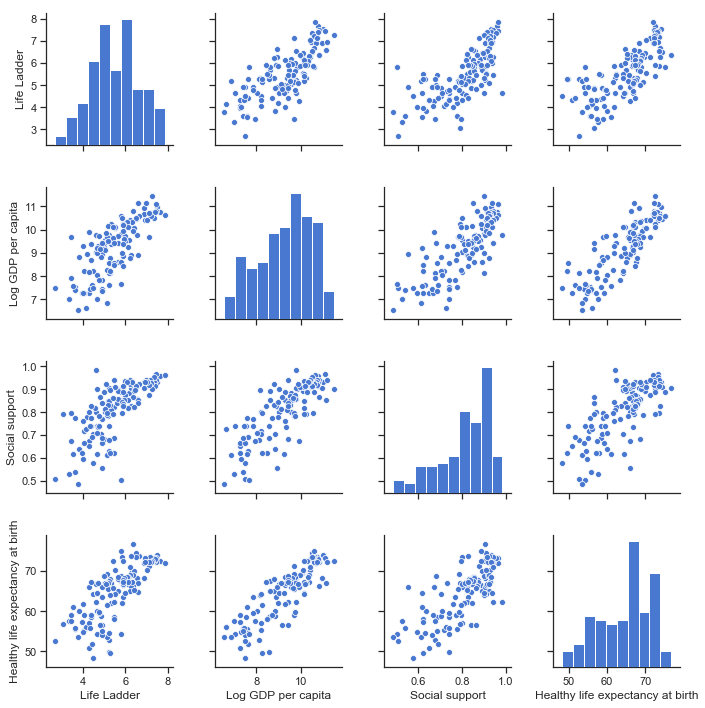

In [220]:
# pairplot of the variables
sns.pairplot(dfh.iloc[:,:6]);



Distribution of Life satisfaction, Income and Social Support by region



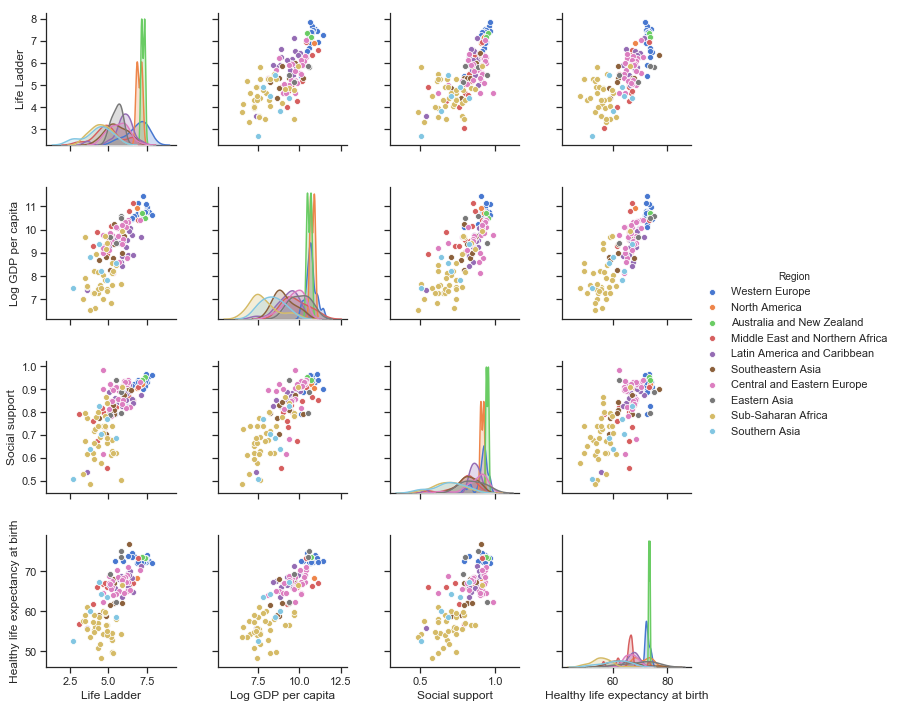

In [222]:
# pairplots showing the Region as the colour of the dots.
print("\nDistribution of Life satisfaction, Income and Social Support by region\n")
sns.pairplot(dfh.iloc[:,:6], hue="Region");

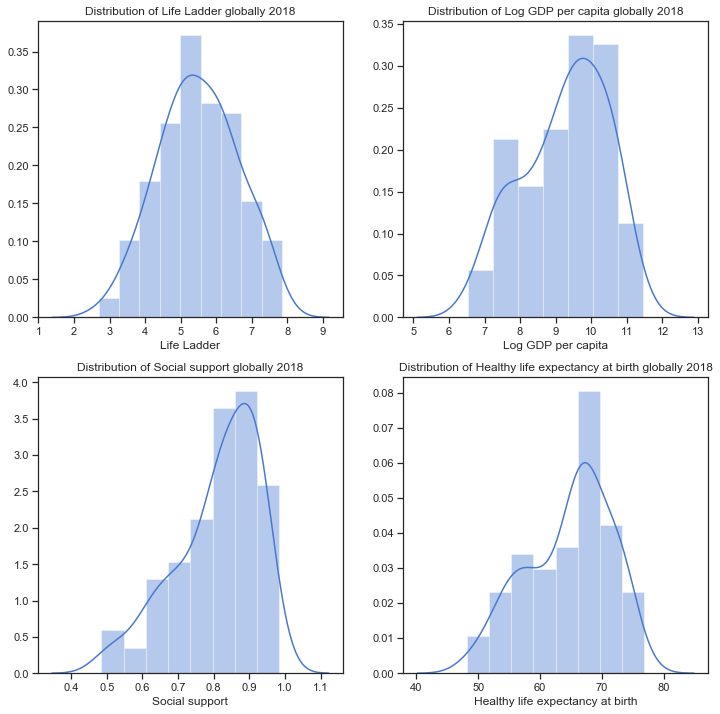

In [215]:
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(12,12))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(dfh['Life Ladder'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Life Ladder globally 2018");

sns.distplot(dfh['Log GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Distribution of Log GDP per capita globally 2018");

sns.distplot(dfh['Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Distribution of Social support globally 2018");

sns.distplot(dfh['Healthy life expectancy at birth'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Distribution of Healthy life expectancy at birth globally 2018");
        

## Statistics of variables for 2018 in the dataset at a global level:

### Central Tendency and variance of the variables.

In [226]:
# summary statistics of the dataset (2018)- just showing the main variables of interest
print("The data available for 2018 only:")
dfh.iloc[:,0:6].describe()

The data available for 2018 only:


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
count,136.000000,127.000000,136.000000,132.000000
mean,5.502134,9.250394,0.810544,64.670832
std,1.103461,1.186589,0.116332,6.728247
min,2.694303,6.541033,0.484715,48.200001
25%,4.721326,8.346278,0.739719,59.074999
50%,5.468088,9.415703,0.836641,66.350002
75%,6.277691,10.166517,0.905608,69.075001
max,7.858107,11.453928,0.984489,76.800003


In [225]:
# summary statistics of data to data - just showing the main variables
df.iloc[:,:7].describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971
std,3.688072,1.121149,1.185794,0.119210,7.583622
min,2005.000000,2.661718,6.457201,0.290184,32.299999
25%,2009.000000,4.610970,8.304428,0.747512,58.299999
50%,2012.000000,5.339557,9.406206,0.833098,65.000000
75%,2015.000000,6.273522,10.193060,0.904432,68.300003
max,2018.000000,8.018934,11.770276,0.987343,76.800003


In [25]:
# summary statistics of the report Figure 2.6 data
df6.describe()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407081,5.512013,5.302148,1.879917,0.905108,1.208793,0.725258,0.392550,0.184840,0.110616
std,1.113132,1.098555,1.128550,0.528787,0.398357,0.299175,0.242144,0.143320,0.095298,0.094540
min,2.852600,3.004615,2.700585,0.183267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544600,4.665040,4.436328,1.512799,0.602895,1.055672,0.548066,0.308071,0.108709,0.047094
50%,5.379550,5.471402,5.285471,1.916539,0.959741,1.271584,0.788698,0.417316,0.177740,0.085482
75%,6.184250,6.276417,6.070340,2.267635,1.232124,1.452774,0.881603,0.507297,0.248372,0.141005
max,7.768900,7.829888,7.707912,3.049498,1.684094,1.623651,1.140899,0.631246,0.565825,0.452687


#### ratio of sample mean to sample standard deviation:

In [26]:
df.iloc[:,4:7].mean()/df.iloc[:,4:7].std()

Log GDP per capita                  7.777455
Social support                      6.799491
Healthy life expectancy at birth    8.322140
dtype: float64

### look at the correlation and covariance of the variables, including the RegionCode.

In [132]:
dfh.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
Life Ladder,1.000000,0.760206,0.719267,0.744264,0.222740
Log GDP per capita,0.760206,1.000000,0.792945,0.852848,0.364472
Social support,0.719267,0.792945,1.000000,0.751514,0.225778
Healthy life expectancy at birth,0.744264,0.852848,0.751514,1.000000,0.409142
RegionCode,0.222740,0.364472,0.225778,0.409142,1.000000


***
# Simulate some data

- Regions and Countries

- Life Ladder 

- Log GDP per capita

- Social Support

- Healthy Life Expectancy at birth

- Freedom

There are several things to consider when simulating data here.
First countries and regions: I cannot make up as such new countries and geographic regions. Therefore I will just create a list of countries by appending a number to 'Country' or something like that!
There are relationships between variables and therefore this must follow through to the simulate dataset. This will pose a bit of a challenge!
I will have to create a new dataframe to hold the simulated data.

If country is in a particular region it is more like to have certain traits than if it is in another geogrpahic region.


    if country in region 1:
    x.append(np.random()
    elif country in region 2:
    x.append(np.random()
    



***
## Simulate Regions and countries.

There are 10 regions in the sample dataset. I need to see the distribution of countries across the regions. How many countries there are in each geographic region. There are different ranges of values depending on geographic region the countries are in.
Therefore I may need to use different distributions to generate.

if country is in region 1:
    income = np.random(with mean and standard deviation)
elif country region == 'different region':
    income  = np.random...


In [27]:
# temporary change the number of rows to be displayed.
pd.options.display.max_rows=40 # set options to display max number of rows
# see how many countries in each Region
df18.Region.value_counts()
# find how many values in total
print(f"There are {len(df18.Region)} countries in the dataset. ")
# calculate the proportion of countries in each region
prob=(df18.Region.value_counts()/len(df18.Region)).round(3)
print(f"These countries are split over 10 geographic regions as follows: \n{df18.Region.value_counts()/len(df18.Region)}.3f %", sep="\n")
# mnake sure they sum to 1. 
prob.sum()

There are 136 countries in the dataset. 
These countries are split over 10 geographic regions as follows: 
Sub-Saharan Africa                 0.250000
Central and Eastern Europe         0.191176
Western Europe                     0.147059
Latin America and Caribbean        0.132353
Middle East and Northern Africa    0.102941
Southeastern Asia                  0.073529
Southern Asia                      0.044118
Eastern Asia                       0.029412
Australia and New Zealand          0.014706
North America                      0.014706
Name: Region, dtype: float64.3f %


1.0

The dataset contains 136 countries over 10 geographic regions.

Here I plot the distribution of countries in the real dataset over the 10 regions. 
To avoid the axes labels overlapping, I have followed advice on [drawing from data](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib) to rotate the axes labels.
Also to show the plot by descending order of the region with the most countries.

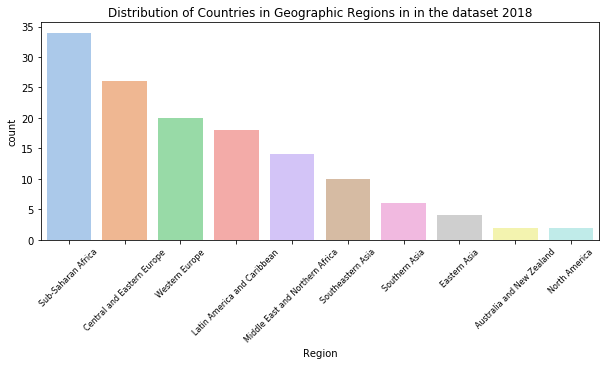

In [28]:
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams["xtick.labelsize"] = 8

sns.set_palette("pastel")
# https://stackoverflow.com/q/46623583 order countplot by count.
chart= sns.countplot(df18.Region, order= df18['Region'].value_counts().index)
# rotate axes labels to avoid overlap - see <https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib>
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Distribution of Countries in Geographic Regions in in the dataset 2018");


#### Simulate some geographic regions.
Use [`numpy.random.choice`](https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html#numpy-random-choice) function to generates a random sample of regions from a one dimensional array of made-up regions using the proportions from the real dataset. 

In [233]:
# makeup region names:
Makeup_regions = ['Region_1','Region_2','Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_9','Region_10']
# assign countries to region based on proportions in actual dataset.
CR= np.random.choice(Makeup_regions, 136, p=[0.25,0.191,0.147,0.132,0.103,0.074,0.044,0.029,0.015,0.015])
len(CR)
CR

array(['Region_2', 'Region_3', 'Region_6', ..., 'Region_5', 'Region_5',
       'Region_1'], dtype='<U9')

#### Make up some country names:
Here I am just going to create some country names by appending a digit to the string 'Sim_Country_'. I don't have the imagination to start creating 139 new countries!

In [234]:
# create a list of countries by appending number to 'country'
countries =[]

for i in range(136):
    countryname = 'Sim_Country_'+str(i)
    countries.append(countryname)
    
len(countries)

136

In [235]:
Cnum = np.arange(136)
len(Cnum)

136

### Create a dataframe to hold the simulated data:
I now have countries and regions for the simulated dataset which I will add to a dataframe.

In [236]:
pd.set_option('max_rows', 8)
# create a dataframe to hold the simulated variables.
sim_df = pd.DataFrame(data={'Sim_Country':countries, 'Sim_Region':CR})
sim_df

,Sim_Country,Sim_Region
0,Sim_Country_0,Region_2
1,Sim_Country_1,Region_3
2,Sim_Country_2,Region_6
3,Sim_Country_3,Region_2
...,...,...
132,Sim_Country_132,Region_2
133,Sim_Country_133,Region_5
134,Sim_Country_134,Region_5
135,Sim_Country_135,Region_1


Here is a countplot showing the distribution of countries across the 10 simulated regions in the same proportion as in the actual dataset for 2018.

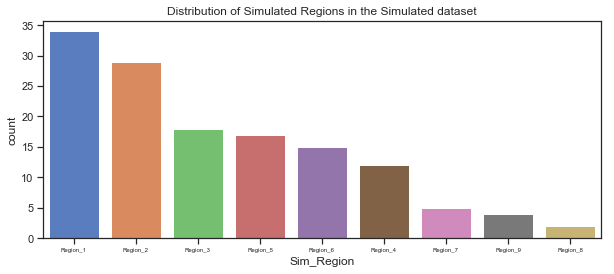

In [237]:
# set the figure size
plt.rcParams["figure.figsize"] = (10,4)
sns.set_palette("muted")
# countplot of simulated region, order by counts
sns.countplot(sim_df.Sim_Region, order= sim_df['Sim_Region'].value_counts().index)
# add title
plt.title("Distribution of Simulated Regions in the Simulated dataset");

The countplot above shows the simulated regions in  the simulated dataset, ordered by the count of the countries in each region. Comparing it to the actual dataset shows that the split looks good.

***
## Simulate Life Ladder:


I am now looking at the Life Ladder variable.
The underlying source of the happiness scores in the [World Happiness Reports](https://worldhappiness.report/faq/) is the Gallup World Poll:

The underlying source of the happiness scores and the happiness rankings in the World Happiness Report is the Gallup World Poll.

>The rankings are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2016-2018. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

The sub-bars show the estimated extent to which each of six factors - levels of GDP, life expectancy, generosity, social support, freedom, and corruption - contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors (see FAQs: What is Dystopia?). The sub-bars have no impact on the total score reported for each country, but instead are just a way of explaining for each country the implications of the model estimated in Table 2.1. People often ask why some countries rank higher than others - the sub-bars (including the residuals, which show what is not explained) are an attempt to provide an answer to that question.

The report itself looks at life evaluations for the 2016 to 2018 period and the rankings across all countries in the study. They look at the 6 key variables and how they contribute to the scores. 
Each country's happiness score is not calculated based on the 6 factors but instead the researchers used the 6 variables to explain the variation of happiness across countries. 

In [238]:
# look at the data again
dfh.iloc[:,0:7].head()

,Country name,Region,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,RegionCode
7,Switzerland,Western Europe,7.508587,10.975945,0.930291,74.099998,3
26,Denmark,Western Europe,7.648786,10.755594,0.958219,72.400002,3
34,Norway,Western Europe,7.444262,11.085626,0.965962,73.199997,3
47,Canada,North America,7.175497,10.701248,0.922719,73.599998,10
58,Finland,Western Europe,7.858107,10.636060,0.962155,71.900002,3


#### Descriptive statistics of the Life Ladder variable in the dataset for 2018:

In [239]:
dfh['Life Ladder'].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

#### Plot of the distribution of Life Ladder for 2018:

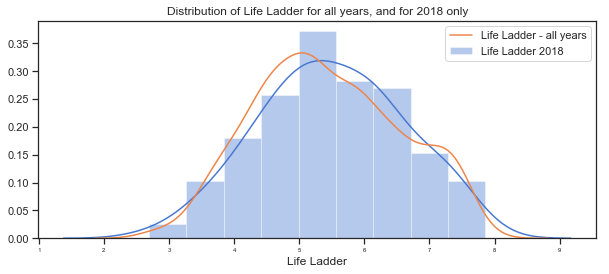

In [240]:
# distribution of the Life Ladder for 2018
sns.distplot(dfh['Life Ladder'], label="Life Ladder 2018")
# kdeplot of the life ladder for all years in the extended dataset (WHR Table2.1)
sns.kdeplot(df['Life Ladder'], label="Life Ladder - all years")

plt.title("Distribution of Life Ladder for all years, and for 2018 only")
plt.legend();

From the distribution plot of the 2018 life ladder variable, it does appear to be normally distributed.
There are some [tests for normality](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/) in a blogpost at <machinelearningmastery.com>. I will use these tests to check if the data is indeed normal.

The blogpost outlines how it is important when working with a sample of data to know whether to use parametric or nonparametric statistical methods. If methods used assume a Gaussian distribution when it is not the case then findings can be incorrect or misleading. In some cases it is enough to assume the data is normal enough to use parametric methods or to transform the data to be normal enough. 

>Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

Normality tests can be used to check if your data sample is from a Gaussian distribution or not.
- Statistical tests calculate statistics on the data to quantify how likely it is that the data was drawn from a normal distribution.
- Graphical methods plot the data to qualitatively evaluate if the data looks Gaussian.

References: <https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/>
<https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/>
Tests for normality include the Shapiro_Wilk Normality Test, the D'Agostino and Pearson's Test, the Anderson-Darling Test.

A histogram of the data is the first step in seeing if the data looks normal. This plots the distribution of the sample of data. A normal distribution has a characteristic bell-shape.


A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.
The histogram of the Life Ladder variable does appear to be gaussian or approximately normal.

A **Quantile-Quantile Plot** also known as the QQ plot 

This can be used for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short. This plots generates its own sample of the idealised distribution that you want to compare your sample of data to. The idealised samples are divided into groups and each data point in the sample is paired with a similar member from the idealised distribution at the same cumulative distribution.

A scatterplot is drawn with the idealised values on the x-axis and the data sample on the y-axis.
The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis. If the result is a straight line of dots on the diagonal from the bottom left to the top right this indicates a perfect match for the distribution whereas if the dots deviate far from the diagonal line.


#### QQ plot of Life Ladder:
Here a QQ plot is created for the Life Ladder sample compared to a Gaussian distribution (the default).

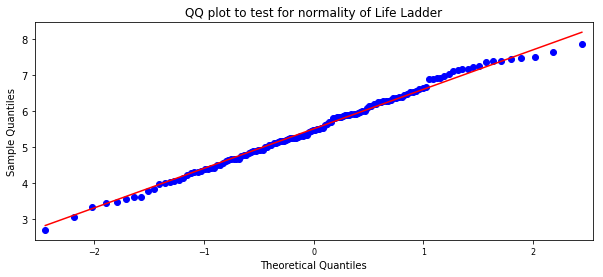

In [38]:
# QQ Plot of Life Ladder
# import the qqplot function 
from statsmodels.graphics.gofplots import qqplot
# Life Ladder observations from the dataset
data = df18['Life Ladder']
# plot a q-q plot, draw the standardised line
qqplot(data, line='s') 
plt.title("QQ plot to test for normality of Life Ladder")
plt.show()

#### Tests for normality:
The QQ plot does seem to indicate to me  that the Life Ladder is normally distributed. The scatter plots of points do mostly follow the diagonal pattern for a sample from a Gaussian distribution.

Here I will use some of the normality tests as outlined on the [blogpost on tests for normality](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/).
These tests assume the sample was drawn from a Gaussian distribution and test this as the null hypothesis. A test-statistic is calculated and a p-value to interpret the test statistic. A threshold level called *alpha* is used to interpret the test. This is typically 0.05.
If the p-value is less than or equal to alpha, then reject the null hypothesis. If the p-value is greater than alpha then fail to reject the null hypothesis.
In general a larger p-value indicates that the sample was likely to have been drawn from a Gaussian distribution. A result above 5% doesn't mean the null hypothesis is true but that it is very likely true given the evidence available.



#### Shapiro-Wilk Normality Test

In [39]:
# adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# import the shapiro test from scipy stats
from scipy.stats import shapiro
# calculate the test statistic and the p-value to interpret the test on the Life Ladder sample
stat, p = shapiro(df18['Life Ladder'])
# interpret the test
alpha= 0.05
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The sample of Life Ladder looks Gaussian (fail to reject H0)')
else:
    print('The sample of Life Ladder does not look Gaussian (reject H0)')

stat=0.991, p=0.520
The sample of Life Ladder looks Gaussian (fail to reject H0)


#### D’Agostino’s K^2 Test
This test calculates the kurtosis and skewness of the data to see if the data distribution is not normal like.
The skew is a measure of asymmetry in the data while hurtosis how much of the distribution is in the tails.


In [40]:
# D'Agostino and Pearson's Test adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# import from scipy.stats
from scipy.stats import normaltest
# normality test
stat, p = normaltest(df18['Life Ladder'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The sample of Life Ladder looks Gaussian (fail to reject H0)')
else:
    print('The sample of Life Ladder does not look Gaussian (reject H0)')


Statistics=2.435, p=0.296
The sample of Life Ladder looks Gaussian (fail to reject H0)


#### Anderson-Darling Test:

This is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples adn can be used to check whether a data sample is normal. The test is a modified version of the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) which is a nonparametric goodness-of-fit statistical test.

The Anderson-Darling test returns a list of critical values rather than a single p-value. The test will check against the Gaussian distribution (dist=’norm’) by default.


In [41]:
# Anderson-Darling Test - adapted from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

from scipy.stats import anderson
# normality test
result = anderson(df18['Life Ladder'])
print('Statistic: %.3f' % result.statistic)
p = 0
# checking for a range of critical values
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        # fail to reject the null that the data is normal if test statistic is less than the critical value.
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        # reject the null that the data is normal if test statistic is greater than the critical value.
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.235
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


The sample of Life Ladder for 2018 does appear to be normally distributed based on the above tests.
Therefore I can go ahead and simulate data for this variable using the normal distribution using the sample mean and standard deviation statistics.


#### Simulate Life ladder variable:

I will now simulate 'Life Ladder' using the [`numpy.random.normal`](https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy-random-normal) function. This takes 3 arguments - `loc` for the mean or centre of the distributon, `scale` for the spread or width of the distribution - the standard deviation, and `size` for the number of samples to draw from the distribution.

In [42]:
print(f" The mean of the sample dataset for 2018 is {df18['Life Ladder'].mean()} ")
print(f" The standard deviation of the sample dataset for 2018 is {df18['Life Ladder'].std()} ")
df18.shape

 The mean of the sample dataset for 2018 is 5.502134340650895 
 The standard deviation of the sample dataset for 2018 is 1.1034612436939353 


(136, 20)

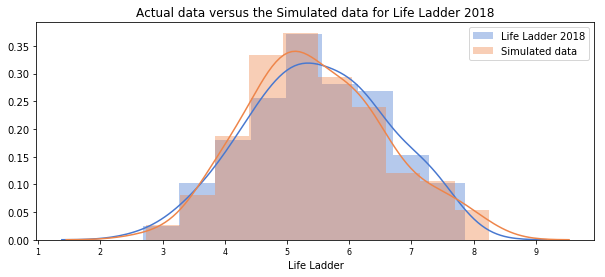

In [43]:
# simulate data based on statistics from the 2018 sample dataset
# simulate life ladder using sample mean and standard deviation
x= np.random.normal(df18['Life Ladder'].mean(),df18['Life Ladder'].std(),136)
# plot the distribution of the actual dataset
sns.distplot(df18['Life Ladder'], label="Life Ladder 2018")
# plot the simulated data 
sns.distplot(x, label="Simulated data")
plt.title("Actual data versus the Simulated data for Life Ladder 2018")
plt.legend();

#### Comparing the simulated sample to the actual sample from the 2018 dataset:
Looking at the single sample above

In [44]:
# print the mean, min, max and standard deviation of the simulated data to compare it with the real data.
print("Samples from the simulation")
print(f"mean: {np.mean(x)}")
print(f" min :{np.min(x)}")
print(f" max: {np.max(x)}")
print(f"standard deviation:{np.std(x)}")
print(f"{len(x)}")

Samples from the simulation
mean: 5.473651276804369
 min :2.738220460781012
 max: 8.247721018688548
standard deviation:1.103700771489449
136


#### Using the t-test to check if the actual sample and simulated sample are statistically different:

[machinelearningmastery](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) again has another blog post on statistical tests that can be used to compare samples of data.
Students T-test can be used to check whether the means of two independent samples are significantly different.

In [46]:
# import Student's t-test from scipy.stats module
from scipy.stats import ttest_ind
# calculate the t-stat and the p-value
stat, p = ttest_ind(x, df18['Life Ladder'])
print('stat=%.3f, p=%.3f' % (stat, p))
# if the p-value is greater than alpha, do not reject the null hypothesis.
if p > 0.05:
    print('Probably the same distribution')
# if the p-value is less than 0.05 reject the null hypothesis.
else:
    print('Probably different distributions')

stat=-0.212, p=0.832
Probably the same distribution


The t-test above was used to compare the simulated sample with the actual sample and showed that the difference of the mean of the two samples was not statistically significant.

#### Simulate using np.random.normal to generate many samples:

Here I use a for loop to run a number of different simulation using the mean and standard deviation from my dataset for 2018. As the random seed has not been set, we would expect to see slightly different distributions each time. All of the plotted histograms show a normal shape.

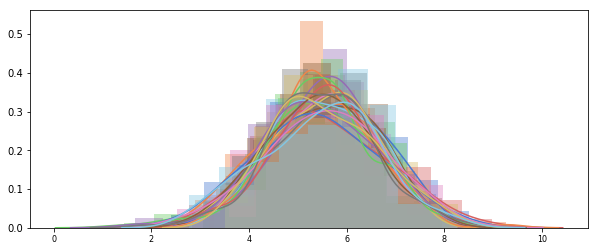

In [47]:
# loop through and plot a  number of simulations:
for i in range(20):
    # using mean and standard deviation from the sample dataset
        Life_sim= np.random.normal(df18['Life Ladder'].mean(),df18['Life Ladder'].std(),136)
        # plot the distributions of the simulated data
        sns.distplot(Life_sim)


#### Compare the multiple simulated samples to the actual data:


In [48]:
Life_sim

array([6.0895, 5.0306, 3.5099, ..., 6.3602, 4.6064, 4.3582])

In [49]:
## print the mean, min, max and standard deviation of the simulated data to compare it with the real data.
print("Samples from the simulation")
print(f"mean: {np.mean(Life_sim)}")
print(f" min :{np.min(Life_sim)}")
print(f" max: {np.max(Life_sim)}")
print(f"standard deviation:{np.std(Life_sim)}")
print(f"{len(Life_sim)}")

Samples from the simulation
mean: 5.4461638481718255
 min :2.7822196407868507
 max: 8.259582796431928
standard deviation:1.183765409162034
136


In [51]:
# import Student's t-test from scipy.stats module
from scipy.stats import ttest_ind
# calculate the t-stat and the p-value
stat, p = ttest_ind(Life_sim, df18['Life Ladder'])
print('stat=%.3f, p=%.3f' % (stat, p))
# if the p-value is greater than alpha, do not reject the null hypothesis.
if p > 0.05:
    print('Probably the same distribution')
# if the p-value is less than 0.05 reject the null hypothesis.
else:
    print('Probably different distributions')

stat=-0.403, p=0.688
Probably the same distribution


## Note! come back to this.
Now that I have simulated data for the Life Ladder variable I need to add it to the dataframe. One problem I see here is that if I am trying to replicate the split of countries into regions as in the actual dataset then I cannot just simply add in the life ladder simulated data. For now I am just going to add the simulated data to the dataframe.
I could look at simulating data for smaller regional distributions rather than based on the full sample.
I will probably look to splitting the data into a smaller number of regions.

In [241]:
print(sim_df.shape)
sim_df.head()
sim_df['Sim_Life_Ladder'] = x
sim_df.head()

(136, 2)


,Sim_Country,Sim_Region,Sim_Life_Ladder
0,Sim_Country_0,Region_2,4.350387
1,Sim_Country_1,Region_3,4.662595
2,Sim_Country_2,Region_6,3.891693
3,Sim_Country_3,Region_2,5.985154
4,Sim_Country_4,Region_6,5.107433


In [243]:

sim_df.describe()

,Sim_Life_Ladder
count,136.000000
mean,5.473651
std,1.107781
min,2.738220
25%,4.712341
50%,5.337043
75%,6.171305
max,8.247721


#### Trying bootstrap on Life Ladder but not necessary as I can simulate from normal distribution.
Just to compare.
Sampling with replacement: using bootstrap.

Bootstrapped Mean Length = 5.494660203947741, 95% CI = [5.3546 5.6322]


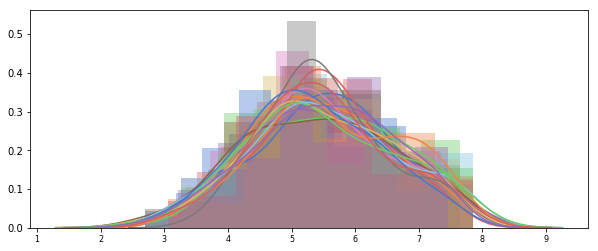

In [52]:
# trying bootstrap adapted from datacamp: 
life=df18['Life Ladder']
# create a list to store the means of the samples, set the number of simulations
mean_life, sims = [], 15
# use loop to create 15 samples - takes very long to do 1000 
for i in range(sims):
    # draw a random sample from life with replacement and store it in life_sample
    life_sample=np.random.choice(life, replace=True, size=len(life))
    # calculate the mean of each sample
    sns.distplot(life_sample)
    sample_mean = np.mean(life_sample)
    # append the mean of each sample to mean_lifes
    mean_life.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_life)
boot_95_ci = np.percentile(mean_life, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

In [53]:
print("Samples from the simulation")
print(f"mean: {life_sample.mean()}")
print(f" min :{life_sample.min()}")
print(f" max: {life_sample.max()}")
print(f"standard deviation:{life_sample.std()}")
print(f"{len(life_sample)}")

Samples from the simulation
mean: 5.5244936382069305
 min :2.694303274154663
 max: 7.463097095489503
standard deviation:1.0837891312256214
136


In [54]:
# Using Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(Life_sim, df18['Life Ladder'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=-0.403, p=0.688
Probably the same distribution


In [244]:
dfh['Life Ladder'].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

***
## Simulating Social Support



## Social Support:
Next I will look at simulating data for the Social support variable. First I look at the summary statistics and then at the plots to see the type of distribution it could be from.

The variable 'Social support' was the result of a question in the Gallop World Poll with the national average of the binary responses for each country to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

The distribution from the dataset shows that it is left skewed.

### Social support variable at global level:

In [185]:
dfh['Social support'].describe()

count    136.000000
mean       0.810544
std        0.116332
min        0.484715
25%        0.739719
50%        0.836641
75%        0.905608
max        0.984489
Name: Social support, dtype: float64

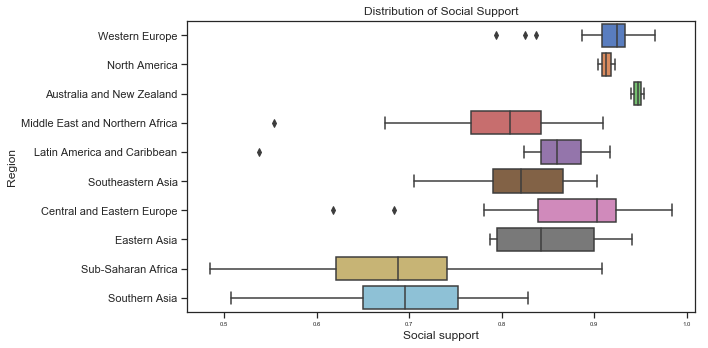

In [246]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 6
sns.boxplot(y="Region", x="Social support", data=dfh);
plt.title("Distribution of Social Support")
plt.tight_layout()
plt.show()

### statistics from the 2018 dataset by region / region code

In [254]:
dfh['Social support'].groupby(dfh['RegionCode']).describe()

,count,mean,std,min,25%,50%,75%,max
RegionCode,,,,,,,,
1,34.0,0.691773,0.098609,0.484715,0.620988,0.688330,0.740679,0.908842
2,26.0,0.872249,0.081660,0.617219,0.839146,0.902753,0.923485,0.984489
3,20.0,0.911804,0.045065,0.793501,0.908284,0.924973,0.933122,0.965962
4,18.0,0.847512,0.082015,0.537976,0.842156,0.860028,0.885538,0.917316
...,...,...,...,...,...,...,...,...
7,6.0,0.688764,0.110865,0.507516,0.649804,0.695308,0.752641,0.828065
8,4.0,0.853319,0.073675,0.787605,0.795194,0.842078,0.900202,0.941514
9,2.0,0.947000,0.009705,0.940137,0.943569,0.947000,0.950431,0.953863
10,2.0,0.913287,0.013338,0.903856,0.908572,0.913287,0.918003,0.922719


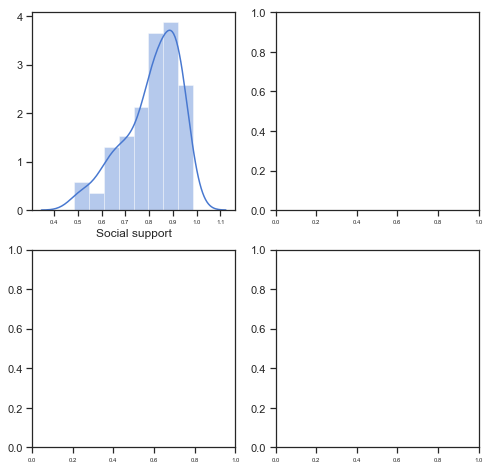

In [257]:
f,axes=plt.subplots(2,2, figsize=(8,8))

sns.distplot(dfh['Social support'], label="Social support 2018", ax=axes[0,0])

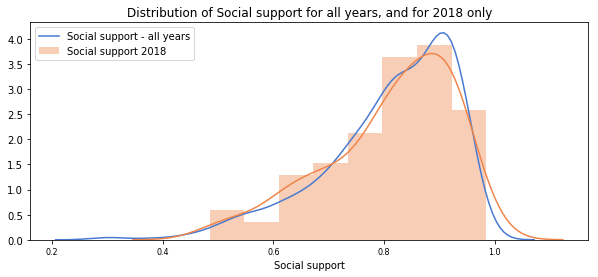

In [200]:
# plot all the data availabe
sns.kdeplot(df['Social support'].dropna(), label="Social support - all years")
# plot the data for social support for 2018.
sns.distplot(dfh['Social support'], label="Social support 2018")
plt.title("Distribution of Social support for all years, and for 2018 only")
plt.legend();

### Testing for normality

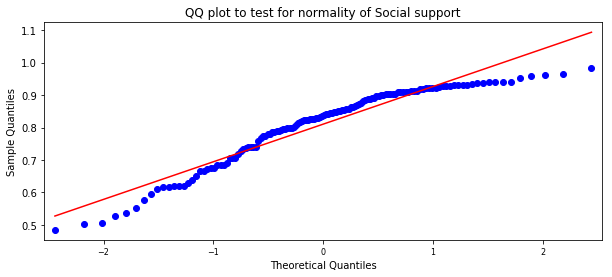

In [143]:
# QQ Plot of Social support
# import the qqplot function 
from statsmodels.graphics.gofplots import qqplot
# Life Ladder observations from the dataset
data = dfh['Social support']
# plot a q-q plot, draw the standardised line
qqplot(data, line='s') 
plt.title("QQ plot to test for normality of Social support")
plt.show()

The histograms and QQ plots show that the Social support variable does not follow a normal distribution like Life Ladder did. I will just do one test to validate this. The histogram shows a left skewed distribution.

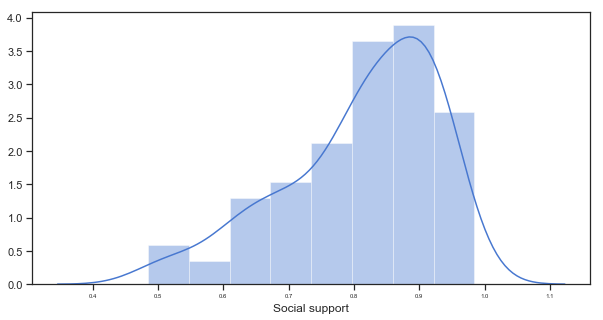

In [258]:
sns.distplot(dfh['Social support'], label="Social support 2018");


- check for normality but doesn't look normally distributed
- a bit more information on bootstrap needed here.
- can either break up the data into regional subsamples or use bootstrapping.
For now using bootstrapping.

The distribution of the sample of Social support values does not look to be normally distributed and the test for normality shows that the data is not normally distributed. There are ways of transforming variable to make them normally distributed. Nonparametric statistical methods  can be used instead of parametric methods.
I will try using the bootstrap resampling method.
Again <machinelearningmastery.com> has a tutorial or blog post on this.

>The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.
[machine learning mastery](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.


The process for building one sample is:
- choose the size of the sample
- While the size of the sample is less than the chosen size
    1. Randomly select an observation from the dataset
    2. Add it to the sample
    
Here I will use the sample size the same as the original dataset. 136
The number of repetitions must be large enough that meaningful repetitions can be calculated on the sample.


The size of my original sample is 136. Randomly sample 



#### Bootstrap Wikipedia:

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

Bootstrapping relies on random sampling with replacement. 

>Bootstrapping is the practice of estimating properties of an estimator (such as its variance) by measuring those properties when sampling from an approximating distribution. One standard choice for an approximating distribution is the empirical distribution function of the observed data. In the case where a set of observations can be assumed to be from an independent and identically distributed population, this can be implemented by constructing a number of resamples with replacement, of the observed dataset (and of equal size to the observed dataset).

The basic idea of bootstrapping is that inference about a population from sample data can be modelled by resampling the sample data and performing inference about a sample from resampled data. As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

The mean of the Social support variable is a single estimate of the mean of the population of social support but we also need some sense of the variability of this mean. The simplest bootstrap method involves taking the original data set of N Social support values and sampling from it to form a new sample (called a 'resample' or bootstrap sample) that is also of size N. The bootstrap sample is taken from the original by using sampling with replacement so, assuming N is sufficiently large, for all practical purposes there is virtually zero probability that it will be identical to the original "real" sample. This process is repeated a large number of times (typically 1,000 or 10,000 times), and for each of these bootstrap samples we compute its mean (each of these are called bootstrap estimates). We now can create a histogram of bootstrap means. This histogram provides an estimate of the shape of the distribution of the sample mean from which we can answer questions about how much the mean varies across samples. 


The bootstrap is a non-parametric way of simulating data using resampling. I don't actually need to use it for Life Ladder as this is normally distribted.

The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

In [181]:
len(dfh['Social support'])

136

[Machinelearningmastery.com blogpost on bootstrap](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)

In [182]:
from sklearn.utils import resample
data=dfh['Social support']
boot = resample(data, replace=True, n_samples=136, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)


Bootstrap Sample: 487     0.922379
933     0.817930
1671    0.684800
1010    0.738480
1636    0.616173
921     0.717720
          ...   
636     0.854277
610     0.940971
1093    0.829381
610     0.940971
1486    0.621303
859     0.781230
Name: Social support, Length: 136, dtype: float64
OOB Sample: [0.9302909970283508, 0.9582188725471495, 0.9659619331359864, 0.9227187633514404, 0.9621550440788268, 0.9394431710243224, 0.9306795597076416, 0.953862726688385, 0.940137267112732, 0.9095954298973083, 0.8758724331855774, 0.9116681218147278, 0.8580688834190369, 0.9038560390472412, 0.8815052509307861, 0.9021924138069152, 0.9378623962402344, 0.9298155307769777, 0.8510413169860841, 0.9284839034080504, 0.8868820667266846, 0.9028406739234924, 0.9043897986412048, 0.9197631478309632, 0.8900849223136902, 0.9214630722999572, 0.8999115824699402, 0.929163932800293, 0.9173156023025512, 0.8709704279899597, 0.8730524182319641, 0.8678483963012695, 0.910314679145813, 0.9315415024757384, 0.8239991664886475, 0.

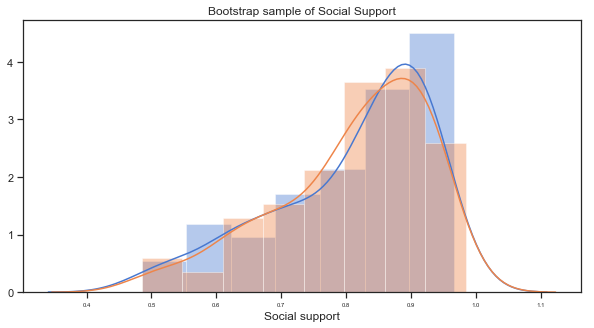

In [270]:
sns.distplot(boot, label="bootstrapped sample");
plt.title("Bootstrap sample of Social Support");
sns.distplot(dfh['Social support'], label="Social support 2018");


In [147]:
print(f" The mean of the Social support sample dataset for 2018 is {dfh['Social support'].mean()} ")
print(f" The standard deviation is {dfh['Social support'].std()} ")
dfh.shape

 The mean of the Social support sample dataset for 2018 is 0.8105441362542265 
 The standard deviation is 0.11633213261117184 


(136, 7)

### Simulate using bootstrap method:
Here I use a loop to draw multiple random samples with replacements from the dataset. The mean is calculated for each sample and then all the means from the different samples are plotted to show their distribution.
A bootstrapped mean and confidence interval is then calculated. 
This is not really what I need here. This is estimating a quantity such as the mean of the population.


Bootstrapped Mean Length = 0.8087618714456276, 95% CI = [0.7903 0.8243]


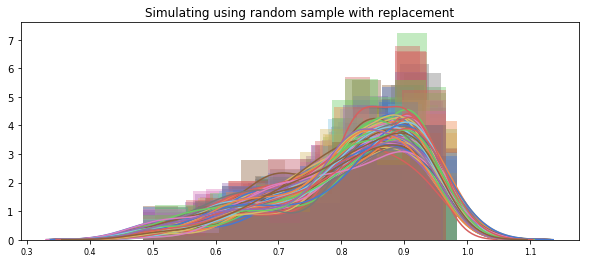

In [175]:
# trying bootstrap adapted from datacamp: 
# using the Social support data from the dataset.
social=dfh['Social support']
# create a list to store the means of the samples, set the number of simulations
mean_social_sim, sims = [], 136
# use loop to create 100 samples - takes very long to do 1000 
for i in range(sims):
    # draw a random sample from social with replacement and store it in social_sample
    social_sample=np.random.choice(social, replace=True, size=len(social))
    # calculate the mean of each sample
    sns.distplot(social_sample)
    plt.title("Simulating using random sample with replacement")
    sample_mean = np.mean(social_sample)
    # append the mean of each sample to mean_social
    mean_social_sim.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_social_sim)
boot_95_ci = np.percentile(mean_social_sim, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))


In [184]:
dfh['Social support'].describe()

count    136.000000
mean       0.810544
std        0.116332
min        0.484715
25%        0.739719
50%        0.836641
75%        0.905608
max        0.984489
Name: Social support, dtype: float64

In [178]:
social_sample.shape

(136,)

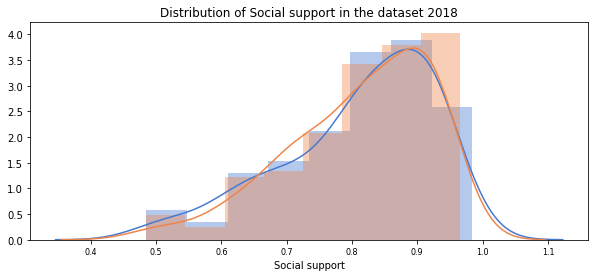

In [179]:
sns.distplot(social)
plt.title("Distribution of Social support in the dataset 2018");
sns.distplot(social_sample);

#### Compare the results of the simulation to the actual data:

In [134]:
print("Samples from the simulation")
print(f"mean: {social_sample.mean()}")
print(f" min :{social_sample.min()}")
print(f" max: {social_sample.max()}")
print(f"standard dimeviation:{social_sample.std()}")
print(f"{len(social_sample)}")

Samples from the simulation
mean: 0.8046756399904981
 min :0.4847152233123779
 max: 0.9659619331359864
standard dimeviation:0.11868641825857511
136


Using T-test to check if the actual sample and the simulated data come from the same distribution.
Here I am only using a single simulated sample for now.

In [135]:
# Using Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(social_sample, df18['Social support'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')



stat=-0.411, p=0.681
Probably the same distribution


## Log GDP per capita

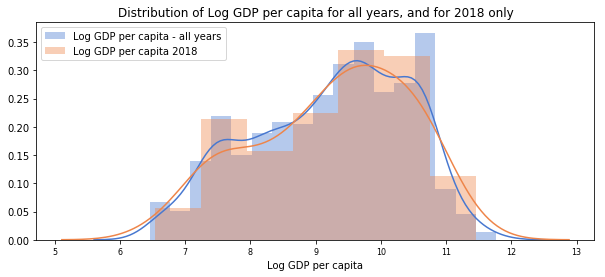

In [118]:
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita - all years")
sns.distplot(df18['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
plt.title("Distribution of Log GDP per capita for all years, and for 2018 only")
plt.legend();

### bootstrapping:

In [151]:
# trying bootstrap adapted from datacamp: 
# using the Social support data from the dataset.
Log_GDP=df18['Log GDP per capita']
# create a list to store the means of the samples, set the number of simulations
mean_gdp_sim, sims = [], 136
# use loop to create 100 samples - takes very long to do 1000 
for i in range(sims):
    # draw a random sample from log GDP per capita with replacement and store it in gdp_sample
    gdp_sample=np.random.choice(Log_GDP, replace=True, size=len(Log_GDP))
    # calculate the mean of each sample
    #sns.distplot(gdp_sample)
    sample_mean = np.mean(gdp_sample)
    # append the mean of each sample to mean_social
    mean_gdp_sim.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_gdp_sim)
boot_95_ci = np.percentile(mean_gdp_sim, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))



Bootstrapped Mean Length = nan, 95% CI = [nan nan]


Have dataframe df with Life Ladder and Log GDP per capita.
Looking for the median Life Ladder score and the correlation between Log GDL and life ladder,

In [141]:
df2=df.loc[:,['Life Ladder','Log GDP per capita']]
df2.head()

,Life Ladder,Log GDP per capita
0,7.473253,10.906543
1,7.524521,10.911548
2,7.776209,10.935776
3,7.492804,10.954624
4,7.572137,10.955430


### Distribution of variables for all years in the dataset globally:

```python
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(12,12))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(df['Life Ladder'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Life Ladder globally");

sns.distplot(df['Log GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Distribution of Log GDP per capita globally");

sns.distplot(df['Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Distribution of Social support globally");

sns.distplot(df['Healthy life expectancy at birth'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Distribution of Healthy life expectancy at birth globally");
```      

### Statistics of variables for all years in the dataset globally:

```python
print("The summary statistics for the Table 2.1 variables in the World Happiness Report:")
df.describe()
```

### Distribution of variables for 2018 in the dataset at a  global level:

### Distribution of Figure 2.6 variables for 2018 in the dataset at a  global level:

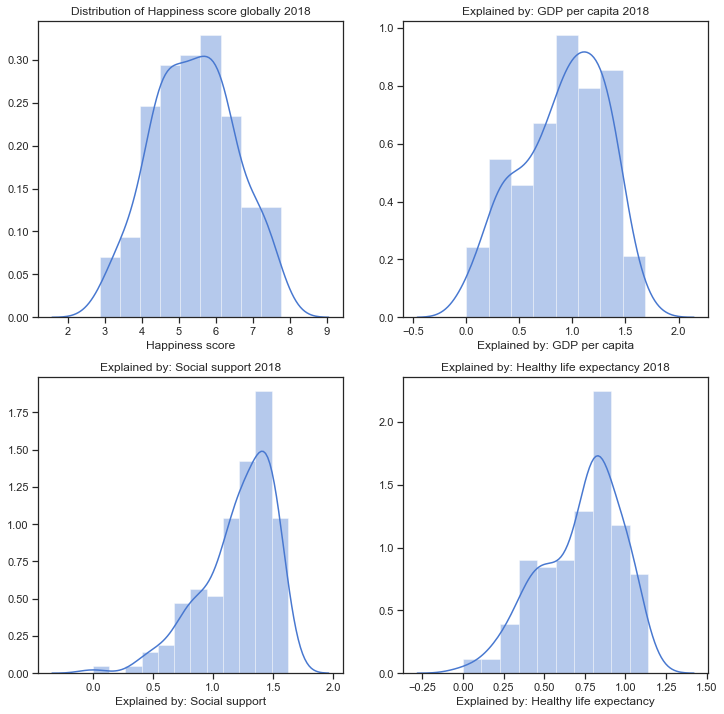

In [40]:
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(12,12))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(df6['Happiness score'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Happiness score globally 2018");

sns.distplot(df6['Explained by: GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Explained by: GDP per capita 2018");

sns.distplot(df6['Explained by: Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Explained by: Social support 2018");

sns.distplot(df6['Explained by: Healthy life expectancy'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Explained by: Healthy life expectancy 2018");
        

### Statistics for 2018 in the dataset at a  global level:

In [41]:
print("The summary statistics for the data in Figure 2.6 of the World Happiness Report 2019:")
df6.describe()

The summary statistics for the data in Figure 2.6 of the World Happiness Report 2019:


,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407081,5.512013,5.302148,1.879917,0.905108,1.208793,0.725258,0.392550,0.184840,0.110616
std,1.113132,1.098555,1.128550,0.528787,0.398357,0.299175,0.242144,0.143320,0.095298,0.094540
min,2.852600,3.004615,2.700585,0.183267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544600,4.665040,4.436328,1.512799,0.602895,1.055672,0.548066,0.308071,0.108709,0.047094
50%,5.379550,5.471402,5.285471,1.916539,0.959741,1.271584,0.788698,0.417316,0.177740,0.085482
75%,6.184250,6.276417,6.070340,2.267635,1.232124,1.452774,0.881603,0.507297,0.248372,0.141005
max,7.768900,7.829888,7.707912,3.049498,1.684094,1.623651,1.140899,0.631246,0.565825,0.452687


## Overall Happiness score




### Life Ladder / Happiness score
Happiness Score or variable named Life Ladder or Cantril Life Ladder. The figures are the national average response to the question of life evaluations.
The values are the national average response to the question of life evaluations. The survey measure is from the January 2019 release of the Gallup World Survey covering the years from 2005 to 2018. 


### Distribution of Life Ladder and Happiness score variables:

Here I am looking at the statistics of the "Life Ladder" variables as well as the "Happiness score" variables from my three dataframes mentioned above. The distributions all seem to follow a normal distribution.
Then I will simulate some data  based on these statistics and plots.

In [78]:
df['Life Ladder'].describe()

count    1704.000000
mean        5.437155
std         1.121149
min         2.661718
25%         4.610970
50%         5.339557
75%         6.273522
max         8.018934
Name: Life Ladder, dtype: float64

In [79]:
df18['Life Ladder'].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

In [81]:
df6['Happiness score'].describe()

count    156.000000
mean       5.407081
std        1.113132
min        2.852600
25%        4.544600
50%        5.379550
75%        6.184250
max        7.768900
Name: Happiness score, dtype: float64

In [107]:
# simulate data for happiness score  and life ladder based on statistics above
HS = np.random.normal(5.407,1.113, 156)
LL=np.random.normal(5.502,1.103,156)

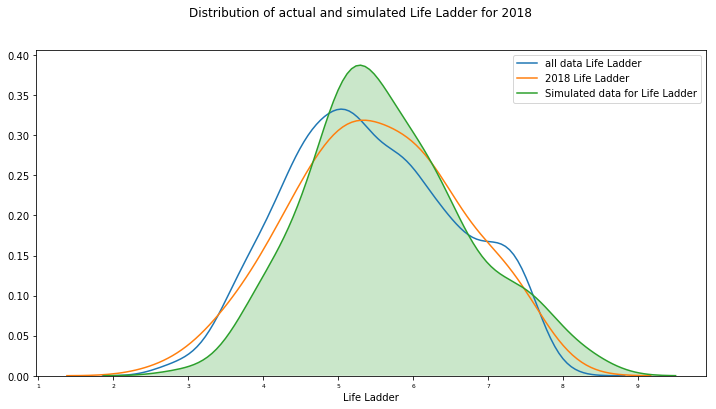

In [115]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

sns.distplot(df['Life Ladder'], hist=False, label="all data Life Ladder");
sns.distplot(df18['Life Ladder'],hist=False, label="2018 Life Ladder");
sns.kdeplot(LL, label="Simulated data for Life Ladder", shade=True)
plt.suptitle("Distribution of actual and simulated Life Ladder for 2018");

Text(0.5, 0.98, 'Simulated and actual data for Happiness Score for 2018')

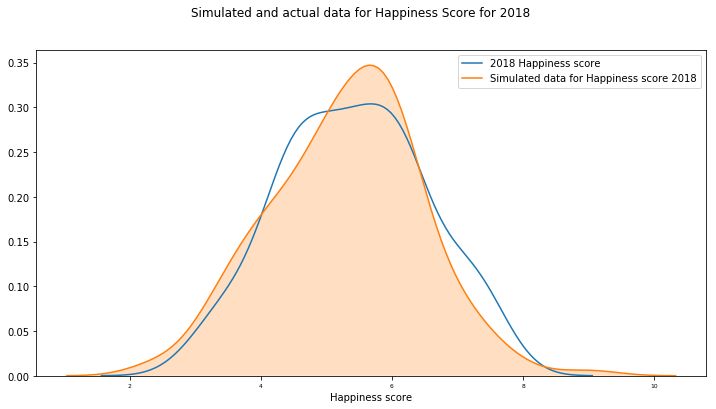

In [116]:
sns.distplot(df6['Happiness score'],hist=False, label="2018 Happiness score");
sns.kdeplot(HS, label="Simulated data for Happiness score 2018", shade=True)

plt.suptitle("Simulated and actual data for Happiness Score for 2018")

Note that while the life ladder data can be simulated like this, the happiness score is calculated based on the other variables so I don't think I should be directly simulating this. For here just to see what it looks like and how it relates to the life ladder. The happiness score is a bit left skewed.


# Log GDP per capita
Log GDP per capita from Table 2.1
Explained by: GDP per capita from Figure 2.6

In [120]:
df['Log GDP per capita'].describe()

count    1676.000000
mean        9.222456
std         1.185794
min         6.457201
25%         8.304428
50%         9.406206
75%        10.193060
max        11.770276
Name: Log GDP per capita, dtype: float64

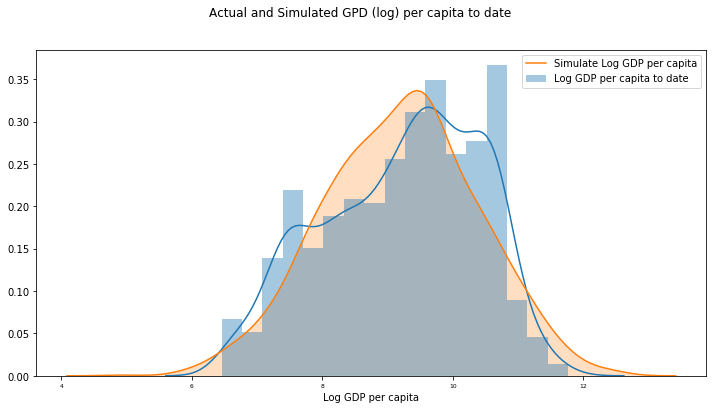

In [132]:
GDP=np.random.normal(9.222,1.18,1676)
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita to date")
sns.kdeplot(GDP,label="Simulate Log GDP per capita", shade=True)
plt.suptitle("Actual and Simulated GPD (log) per capita to date")
plt.legend;

In [123]:
df18['Log GDP per capita'].describe()

count    127.000000
mean       9.250394
std        1.186589
min        6.541033
25%        8.346278
50%        9.415703
75%       10.166517
max       11.453928
Name: Log GDP per capita, dtype: float64

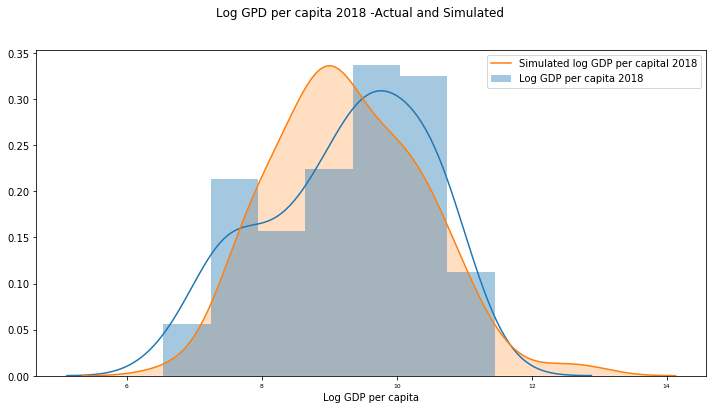

In [134]:
gdp18=np.random.normal(9.250,1.18,127)
sns.distplot(df18['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
sns.kdeplot(gdp18, shade=True, label="Simulated log GDP per capital 2018")
plt.legend()
plt.suptitle("Log GPD per capita 2018 -Actual and Simulated");

In [135]:
df6['Explained by: GDP per capita'].describe()

count    156.000000
mean       0.905108
std        0.398357
min        0.000000
25%        0.602895
50%        0.959741
75%        1.232124
max        1.684094
Name: Explained by: GDP per capita, dtype: float64

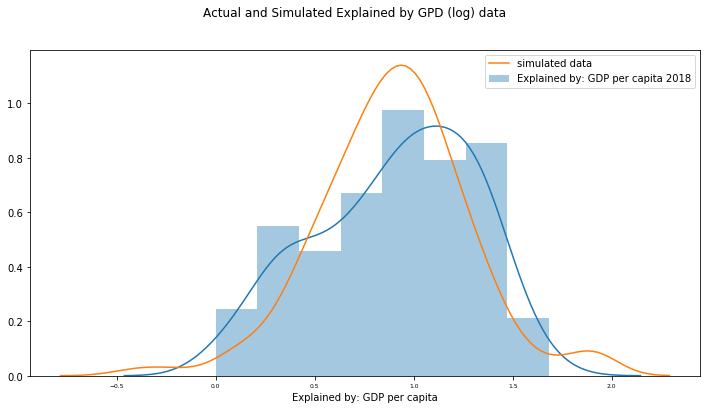

In [136]:
ExpGDP= np.random.normal(0.905,0.398,156)
sns.distplot(df6['Explained by: GDP per capita'].dropna(), label="Explained by: GDP per capita 2018")
sns.kdeplot(ExpGDP, label="simulated data")
plt.suptitle("Actual and Simulated Explained by GPD (log) data")
plt.legend();

In [137]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

# Healthy Life Expectancy
- Healthy life expectancy at birth from Table 2.1
- Explained by: Healthy life expectancy from Figure 2.6

In [141]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [142]:
df['Healthy life expectancy at birth'].describe()

count    1676.000000
mean       63.111971
std         7.583622
min        32.299999
25%        58.299999
50%        65.000000
75%        68.300003
max        76.800003
Name: Healthy life expectancy at birth, dtype: float64

In [144]:
HLE=np.random.normal(63.11,7.583,1676)

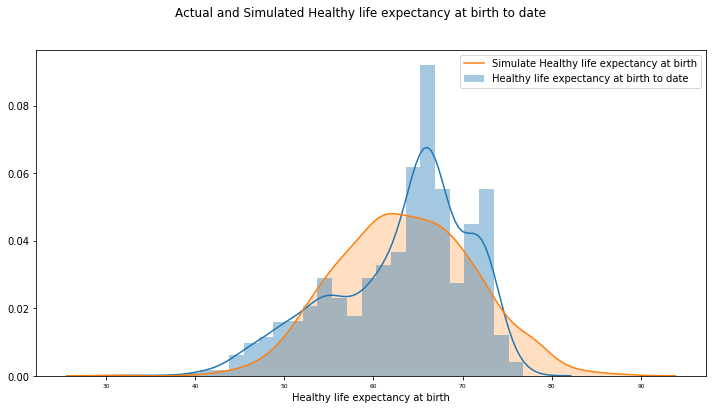

In [145]:
sns.distplot(df['Healthy life expectancy at birth'].dropna(), label="Healthy life expectancy at birth to date")
sns.kdeplot(HLE,label="Simulate Healthy life expectancy at birth", shade=True)
plt.suptitle("Actual and Simulated Healthy life expectancy at birth to date")
plt.legend;

## Regions and Countries

In [193]:
dfh['Life Ladder'].describe()
dfh.groupby('Region').describe()

# subsetting to get dataframes per region.
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]



count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

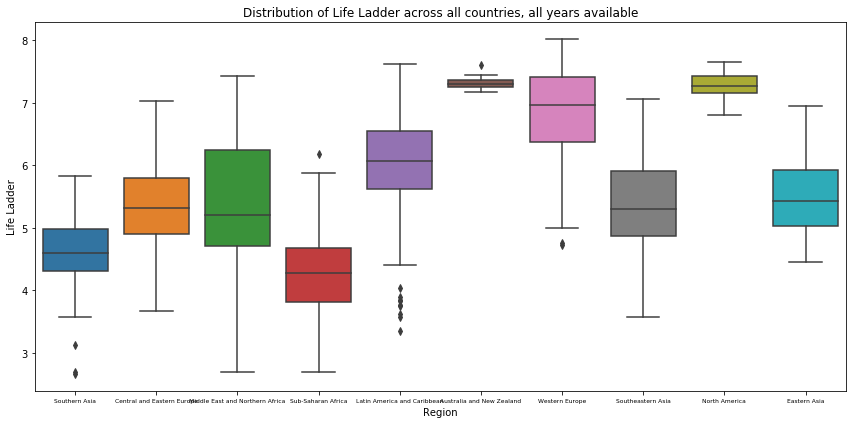

In [282]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Life Ladder'])
plt.title("Distribution of Life Ladder across all countries, all years available")


plt.tight_layout()
plt.show()

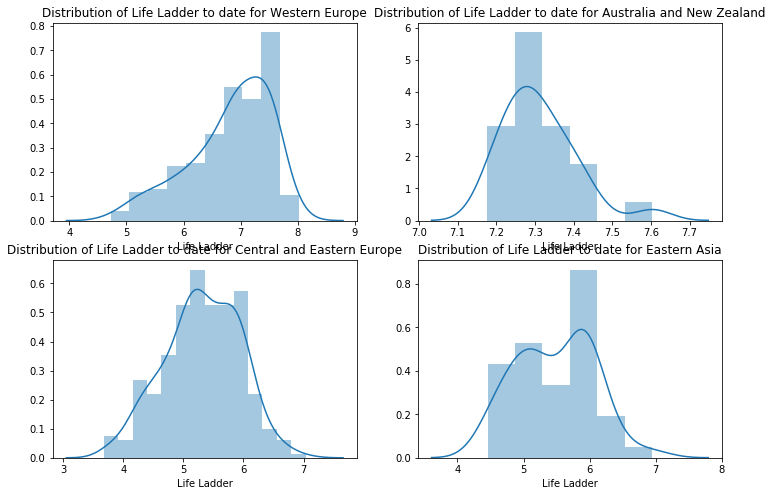

In [260]:
f,axes = plt.subplots(2,2,figsize=(12,8))
sns.distplot(WE['Life Ladder'].dropna(), ax=axes[0,0])
axes[0,0].set_title("Distribution of Life Ladder to date for Western Europe");
sns.distplot(ANZ['Life Ladder'].dropna(), ax=axes[0,1])
axes[0,1].set_title("Distribution of Life Ladder to date for Australia and New Zealand");
sns.distplot(CEE['Life Ladder'].dropna(), ax=axes[1,0])
axes[1,0].set_title("Distribution of Life Ladder to date for Central and Eastern Europe");
sns.distplot(EA['Life Ladder'].dropna(), ax=axes[1,1])
axes[1,1].set_title("Distribution of Life Ladder to date for Eastern Asia");

### Incomes and Happiness levels:

Higher national incomes go together with higher average life satisfaction. Countries with higher average national incomes tend to have higher average life satisfaction scores. The scatterplot below shows how higher levels of satisfaction or happiness are associated with higher levels of Log GDP per capita. This will need to be taken into consideration when simulating these two variables. 

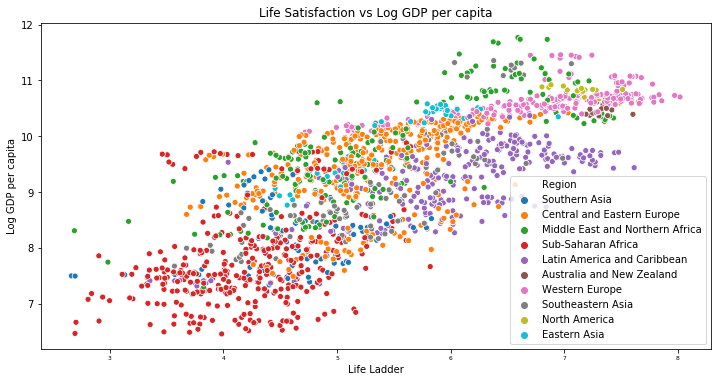

In [23]:
sns.scatterplot(y = df['Log GDP per capita'],x= df['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita");

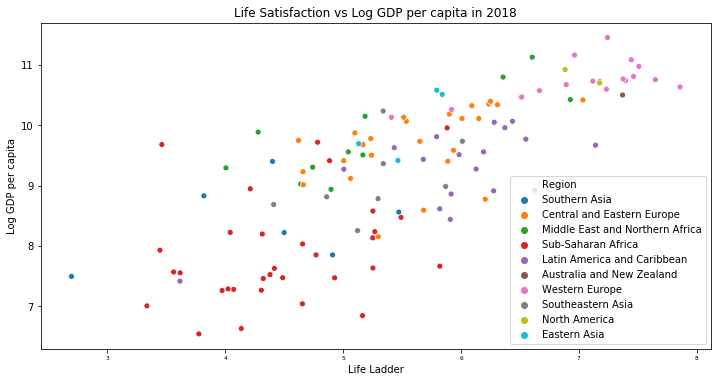

In [45]:
sns.scatterplot(y = df2018['Log GDP per capita'],x= df2018['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita in 2018");

```python
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]
```


# GDP per capita

The GDP per capita in the World Happiness Report dataset are in purchasing power parity at constant 2011 international dollar prices which are mainly from the World Development Indicators in 2018. The log of the GDP figures is taken.

Per capita GDP is the Total Gross Domestic Product for a country divided by its population. It breaks down a country's GDP per person and is considered a universal measure for gauging the prosperity of nations.

Regular “nominal” GDP divided by the current population is fine when looking at one point in time in a single country. “Nominal” means GDP per capita is measured in current dollars. When looking to compare GDP per capita between countries then the purchasing power parity GDP must be used. 

#### References

<https://ec.europa.eu/eurostat/statistics-explained/index.php/Beginners:GDP_-_Comparing_GDP:_growth_rate_and_per_capita#How_can_the_GDP_of_countries_of_different_sizes_be_compared.3F>

<https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848>


<https://www.investopedia.com/terms/p/per-capita-gdp.asp>

<http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf>

Per capita GDP is a unimodal but skewed distribution

In [49]:
df2018.head()
df2018.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,133.0,133.000000,125.000000,133.000000,130.000000,133.000000,125.000000,126.000000,132.000000,132.000000,...,0.0,121.000000,130.000000,0.0,9.000000,17.000000,49.000000,39.000000,48.000000,50.000000
mean,2018.0,5.504264,9.266138,0.810440,64.808076,0.785587,-0.027913,0.731127,0.707636,0.294949,...,NaN,0.383993,0.459551,NaN,0.399879,0.279307,0.255859,0.261581,0.271363,0.236869
std,0.0,1.110096,1.184088,0.116804,6.686527,0.118920,0.156427,0.188487,0.112077,0.087669,...,NaN,0.081460,0.125984,NaN,0.135524,0.115659,0.124502,0.144652,0.168913,0.161875
min,2018.0,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.106871,...,NaN,0.211000,0.200969,NaN,0.176535,0.066020,0.048720,0.075872,0.048552,0.031518
25%,2018.0,4.661909,8.439203,0.739841,59.624999,0.716484,-0.149109,0.687893,0.638779,0.220041,...,NaN,0.325600,0.367298,NaN,0.290300,0.223553,0.179177,0.152993,0.147861,0.120060
50%,2018.0,5.471554,9.434348,0.835890,66.400002,0.797066,-0.038008,0.793425,0.725434,0.287869,...,NaN,0.368750,0.433333,NaN,0.407623,0.282587,0.235000,0.230289,0.202638,0.185033
75%,2018.0,6.276443,10.184117,0.908726,69.225002,0.877404,0.065061,0.851654,0.792829,0.359349,...,NaN,0.432000,0.542773,NaN,0.478149,0.335200,0.302642,0.364926,0.397838,0.345812
max,2018.0,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836,...,NaN,0.626000,0.786517,NaN,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


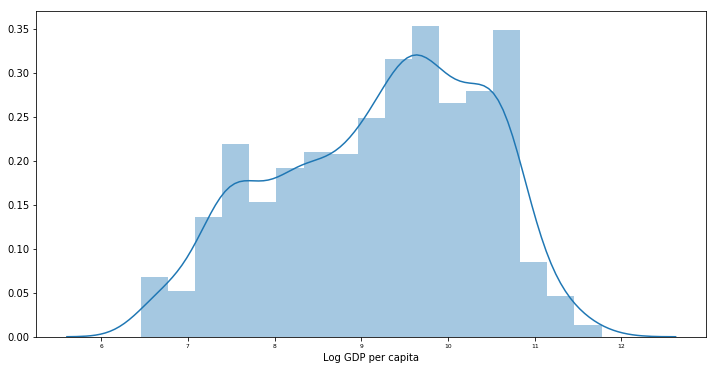

In [41]:
sns.distplot(df['Log GDP per capita'].dropna())

In [15]:
df.head(2)

,Country,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Southern Asia,2008.0,3.723590,7.16869,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Southern Asia,2009.0,4.401778,7.33379,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df['Log GDP per capita'].describe()

count    1647.000000
mean        9.213981
std         1.182664
min         6.457201
25%         8.298149
50%         9.400388
75%        10.166996
max        11.770276
Name: Log GDP per capita, dtype: float64

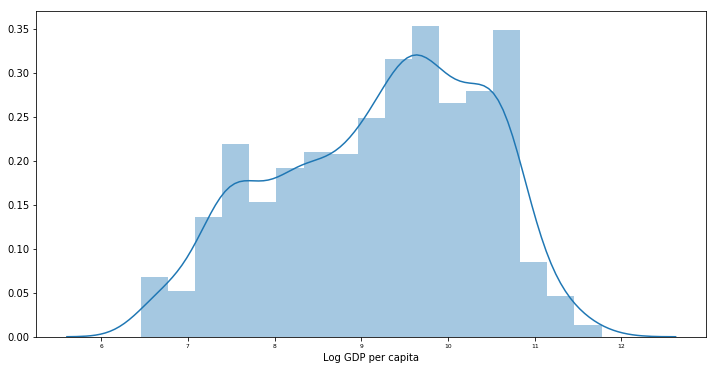

In [17]:
plt.rcParams["figure.figsize"] = (12,6)
sns.distplot(df['Log GDP per capita'].dropna());

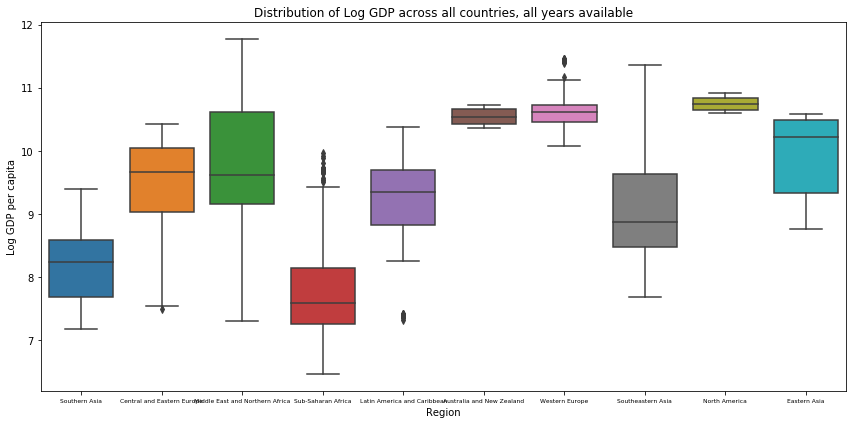

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Log GDP per capita'])
plt.title("Distribution of Log GDP across all countries, all years available")


plt.tight_layout()
plt.show()

From the above boxplots by geographic regions it is evident that there is great variations between regions in the distribution of GDP per capita.

### Freedom to make life choices

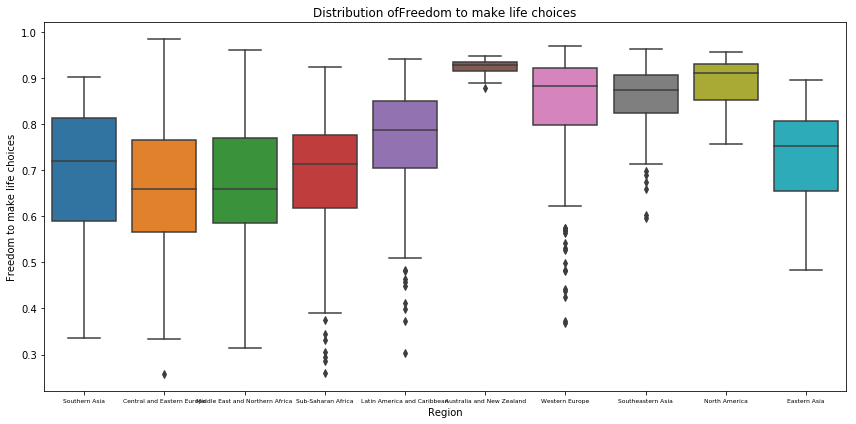

In [286]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Freedom to make life choices'])
plt.title("Distribution ofFreedom to make life choices")


plt.tight_layout()
plt.show()

### Healthy Life Expectancy at birth


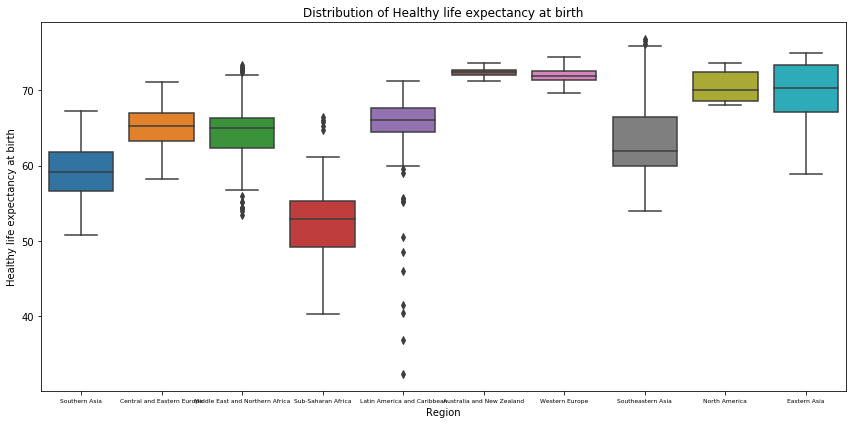

In [287]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Healthy life expectancy at birth'])
plt.title("Distribution of Healthy life expectancy at birth")


plt.tight_layout()
plt.show()

#### Generosity


```python
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Generosity'])
plt.title("Distribution of Generosity")


plt.tight_layout()
plt.show()
```

#### Perceptions of Corruption

```python
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Perceptions of corruption'])
plt.title("Distribution of Perceptions of corruption")


plt.tight_layout()
plt.show()
```

#### GINI index (World Bank estimate)

```python
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['GINI index (World Bank estimate)'])
plt.title("Distribution of GINI index (World Bank estimate)")


plt.tight_layout()
plt.show()
```

#### GINI index (World Bank estimate), average 2000-16

```python

plt.["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['GINI index (World Bank estimate), average 2000-16'])
plt.title("Distribution of GINI index (World Bank estimate), average 2000-16")


plt.tight_layout()
plt.show()
```

#### gini of household income reported in Gallup, by wp5-year

```python
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['gini of household income reported in Gallup, by wp5-year'])
plt.title("Distribution of gini of household income reported in Gallup, by wp5-yea")


plt.tight_layout()
plt.show()
```


#### Western Europe - Region 1
Simulate a dataset for a region containing 20 countries with data simulated to correspond to the distribution of the variables in Western Europe.
There are too little observations this way. Look at bootstrap or amalgamate regions with simular statistics.


```
WE = CR.loc[CR.loc[:,'Region']=='Western Europe']
# drop na (North Cyprus)
WE.dropna()
```

```python
# loop through each of the countries in the region and plot the distributions
Z = WE.dropna() # set Z to be western Europe countries
for i in Z.iloc[:, 3:]:
    print(Z[i].describe())
    # plot a distogram
    sns.distplot(Z[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
```

In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,4))

## Health Life Expectancy by Region

df.columns

x = df['Health (Life Expectancy)']
sns.distplot(x)
plt.title("Distribution of Life Expectancy variable for all countries")

df.groupby('Region').describe()

I could simulate the data for the 157 countries. Sort them so that they are in the same rank as the original dataset.
There are 10 different regions which will likely have different distributions. 


```python
# create a list of country names by appending number to Country
# setup empty list for country
country=[]
# use for loop to append a number to 'country'
for i in range(1,157):
#i=np.arange(1,141)
  country.append('Country'+str(i))
#set up empty list for region
region=[]
# loop through, append a number to 'Region'
for i in range(1,11):
    region.append('Region'+str(i))
print(country)
print(region)
```

```python
country=[]
region=[]
for i in range(1,11):
    region.append('Region'+str(i))
    for j in range(1,15):
        country.append('Country'+str(i))
#print(region)
print(country) 
```

### Simulate the distribution

sns.distplot(np.random.pareto(8.603, 1000));

### Average Life Expectancy

This is a left skewed distribution and is not normally distributed.
The mean is less than the median

The three most commonly used transformatiosn for quantitative data are the logarithm, the square root and the reciprocal. These are called variance_stabilising.

Pareto and Power distributions.

sns.distplot(hpi16['Average_Life_Expectancy'], bins=30);

sns.distplot(np.log10(hpi16['Average_Life_Expectancy']))

sns.boxplot(hpi16['Average_Life_Expectancy'])

hpi16['Average_Life_Expectancy'].describe()

a,m = 71,50
s=(np.random.pareto(a,140)+1)*m
sns.distplot(s)

s= np.random.uniform(48.91,83.572,140)
sns.distplot(s)

a=76
samples =1400
s=np.random.power(a,samples)
sns.distplot(s)

In [162]:
s

array([0.9918, 0.998 , 0.9989, ..., 0.9871, 0.9958, 0.9996])

hpi16.groupby(['Region','Average_Life_Expectancy']).sum()

y= np.random.normal(70.925,8.725,140)#
sns.distplot(y)